# Résumé

Cette partie du projet se décompose en deux points :
- une concernant la segmentation selon la méthodologie RFM
- la deuxième se concentre sur l'utilisation d'un modèle de clustering et la stabilité temporelle de l'attribution de ces clusters

La méthode RFM consiste à segmenter notre précédente base de données selon 3 variables (voir 1. RFM Segmentation) et à calculer un score pour chaque client. Le score obtenu définie dans quelle catégorie le client appartient. Il existe plusieurs catégories de clients en fonction de leurs comportements d'achat.
Au vu de notre jeu de données, cette méthode n'a pas pu correctement identifiée chaque catégorie de client. La visualisation des catégories de clients montre un chevauchement des catégories. De plus certaines sont mieux définies que d'autres (concentration vs dispersivité des points sur la visualisation 2D).

Dans un second, la base de données issue de la précédente partie a été utilisée. Elle a été agrégée par clients uniques en prenant en compte toutes les données pertinentes. Cependant agréger les variables catégorielles a posé quelques problèmes c'est pourquoi elles n'ont pas été prises en compte. En effet moins de 5% des clients ont effectué plusieurs achats. De ce fait agréger par clients uniques n'impliquent aucun problème pour les variables numériques mais ce qui n'est pas le cas pour les variables catégorielles. Il n'y a aucun sens à effectuer la somme ou la moyennes sur une variable de type catégorie de produit par exemple. Enfin un encodage type One Hot Encoder aurait généré un surplus de nouvelles variables trop important eu égard de la cardinalité de certaines variables catégorielles.

Etant donné la taille du jeu de données, seulement un échantillon a été étudié. La base de donnée a subi un prétraitement (pipeline de preprocessing). Plusieurs méthodes de réduction dimensionnelles ont été testés. UMAP a été retenu par rapport aux autres pour sa capacité à projeter des clusters denses  et séparés(non encore labellisés à ce stade) et à sa rapidité.

Deux modèles de clustering ont été testés : K-Means et MiniBatchK-Means. La détermination du nombre de clusters optimal a été faite à partir de la visualisation de l'évolution de métriques propres aux problématiques de clustering en fonction de n_cluster. Les métriques utilisées sont l'inertie, le score de Silhouette, le coefficient de Calinski Harabasz et le coefficient de Bouldin. D'après les résultats 6 clusters sont à utiliser.

Pour le modèle sélectionné associé à son nombre de cluster optimale il a fallu déterminer quelles étaient les variables qui contribuaient le plus aux résultats du modèle. Toujours sur l'échantillon, chaque client unique a été étiquetté. Nous nous sommes placés dans un problème de classification et avons utilisé la méthode features_importance associée au classifier Random Forest. Ceci a permis de faire ressortir 5 variables sur les 20 initiales propre à l'échantillon. 

Ces 5 variables ont ensuite été utilisées pour caractériser nos 6 clusters.

Enfin dans un dernier temps, il a été question de la stabilité temporelle de l'attribution des clusters. Chaque client unique du dataset complet a été étiquetté. Puis la base de donnée complète a été séparé selon une périodicité mensuelle. Chaque période de base de donné a été étiquetté. Puis le coefficient ARI (voir Point 7) a été calculé entre les étiquettes de clusters de la base de données complètes et ceux de chaque mensualité. Les résultats obtenus ont été plottés pour visualiser l'évolution temporelle. Les 9 premiers mois la similarité des clusters restent approximative (ARI = 0.53) mais stable. Après 9 mois, la stabilité chute. Donc on peut en déduire qu'une maintenance préventive est de rigueur après cette durée.

Cependant un travail reste à faire pour améliorer le coefficient ARI. (Feature Engineering)

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Résumé" data-toc-modified-id="Résumé-1">Résumé</a></span><ul class="toc-item"><li><span><a href="#1.-RFM-Segmentation" data-toc-modified-id="1.-RFM-Segmentation-1.1">1. RFM Segmentation</a></span></li><li><span><a href="#2.-Sélection-d'un-modèle" data-toc-modified-id="2.-Sélection-d'un-modèle-1.2">2. Sélection d'un modèle</a></span><ul class="toc-item"><li><span><a href="#2.1-Aggrégation" data-toc-modified-id="2.1-Aggrégation-1.2.1">2.1 Aggrégation</a></span></li><li><span><a href="#2.2-Sélection-d'un-échantillon" data-toc-modified-id="2.2-Sélection-d'un-échantillon-1.2.2">2.2 Sélection d'un échantillon</a></span></li><li><span><a href="#2.3-Preprocessing" data-toc-modified-id="2.3-Preprocessing-1.2.3">2.3 Preprocessing</a></span></li><li><span><a href="#2.4-Visualisation-des-variables-preprocessed" data-toc-modified-id="2.4-Visualisation-des-variables-preprocessed-1.2.4">2.4 Visualisation des variables preprocessed</a></span></li><li><span><a href="#2.5-Test-de-plusieurs-méthodes-de-réduction-dimensionnelle" data-toc-modified-id="2.5-Test-de-plusieurs-méthodes-de-réduction-dimensionnelle-1.2.5">2.5 Test de plusieurs méthodes de réduction dimensionnelle</a></span></li><li><span><a href="#2.6-Projection-2D-dans-les-nouveaux-plans-réduits" data-toc-modified-id="2.6-Projection-2D-dans-les-nouveaux-plans-réduits-1.2.6">2.6 Projection 2D dans les nouveaux plans réduits</a></span></li></ul></li><li><span><a href="#3.-Modèles-de-clustering" data-toc-modified-id="3.-Modèles-de-clustering-1.3">3. Modèles de clustering</a></span><ul class="toc-item"><li><span><a href="#3.1-K-Means---UMAP-:-Metrics" data-toc-modified-id="3.1-K-Means---UMAP-:-Metrics-1.3.1">3.1 K-Means - UMAP : Metrics</a></span></li><li><span><a href="#3.2-K-Means---UMAP-:-Silhouettes-Plots" data-toc-modified-id="3.2-K-Means---UMAP-:-Silhouettes-Plots-1.3.2">3.2 K-Means - UMAP : Silhouettes Plots</a></span></li><li><span><a href="#3.3-MiniBatchKMeans---UMAP-:-Metrics" data-toc-modified-id="3.3-MiniBatchKMeans---UMAP-:-Metrics-1.3.3">3.3 MiniBatchKMeans - UMAP : Metrics</a></span></li><li><span><a href="#3.4-MiniBatchKMeans---UMAP-:-Silhouettes-Plots" data-toc-modified-id="3.4-MiniBatchKMeans---UMAP-:-Silhouettes-Plots-1.3.4">3.4 MiniBatchKMeans - UMAP : Silhouettes Plots</a></span></li></ul></li><li><span><a href="#4.-Modèle-sélectionné" data-toc-modified-id="4.-Modèle-sélectionné-1.4">4. Modèle sélectionné</a></span></li><li><span><a href="#5.-Features-importances" data-toc-modified-id="5.-Features-importances-1.5">5. Features importances</a></span></li><li><span><a href="#6.-Caractérisation-des-clusters" data-toc-modified-id="6.-Caractérisation-des-clusters-1.6">6. Caractérisation des clusters</a></span></li><li><span><a href="#7.-Stabilité-temporelle" data-toc-modified-id="7.-Stabilité-temporelle-1.7">7. Stabilité temporelle</a></span></li></ul></li></ul></div>

## 1. RFM Segmentation

L'analyse RFM est une technique de segmentation du comportement des clients basée sur les données où RFM signifie récence, fréquence et valeur monétaire.

L'idée est de segmenter les clients en fonction de la date de leur dernier achat (Récence), de la fréquence à laquelle ils ont acheté dans le passé (Fréquence) et du montant qu'ils ont dépensé (Monétaire). Ces trois mesures sont des prédicteurs efficaces de la volonté d'un client à répondre à des messages et à des offres marketing.

In [1]:
# Packages Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats
import datetime as dt
from datetime import datetime, timedelta
from pylab import figure, text, scatter, show

In [2]:
# Modification des options d'affichage des colonnes
pd.set_option('display.max_colwidth', None)

# Modification des options d'affichage du dataset
pd.set_option('display.max_column', 100)

import warnings
warnings.filterwarnings("ignore")

In [3]:
# Matplotlib default parameters
import matplotlib.style
plt.style.use('bmh')

In [4]:
# Lecture du dataset cleansed
df = pd.read_csv(r"C:\Users\valen\Desktop\Formation Data Scientist\P5\P5 Valentin\dataset_clean_projet_5.csv", 
                 index_col=0)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 119151 entries, 0 to 119150
Data columns (total 52 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   order_id                       119151 non-null  object 
 1   customer_state                 119151 non-null  object 
 2   review_delay                   119151 non-null  float64
 3   customer_zip_code_prefix       119151 non-null  int64  
 4   customer_unique_id             119151 non-null  object 
 5   review_answer_timestamp        119151 non-null  object 
 6   review_creation_date           119151 non-null  object 
 7   review_score                   119151 non-null  int64  
 8   review_id                      119151 non-null  object 
 9   customer_city                  119151 non-null  object 
 10  review_answer_delay            119151 non-null  float64
 11  customer_id                    119151 non-null  object 
 12  order_estimated_delivery_date 

L'importation du dataset a modifié les variables de type datetime64[ns] en object. Il est nécessaire de reconvertir les variables correspondantes.

In [6]:
features_to_convert = ['review_answer_timestamp',
 'review_creation_date',
 'order_estimated_delivery_date',
 'purchase_time',
 'order_approved_at',
 'shipping_limit_date',
 'order_delivered_carrier_date',
 'order_delivered_customer_date']

In [7]:
df[features_to_convert] = df[features_to_convert].astype('datetime64[ns]')

In [8]:
# Fonction permettant de générer les trois variables Recency, Frequency et Monetary
# Spécifique à la segmentation RFM

def calculateRFM(data):
    # Aggregate data by each customer
    rfm = data.groupby(['customer_unique_id']).agg({
        'purchase_time': lambda x: (today - x.max()).days,
        'order_id': 'count',
        'payment_value': 'sum'})

    # Rename columns
    rfm.rename(columns={'purchase_time': 'Recency',
                        'order_id': 'Frequency',
                        'payment_value': 'Monetary'}, inplace=True)
    return rfm

In [9]:
# Histogrammes des variables R,F et M

def hist_rfm(rfm) :
    fig = plt.figure(1, figsize=(15, 4))

    # Histogramme de la variable Recency
    plt.subplot(1, 3, 1)
    sns.distplot(rfm.Recency, label='Recency',
                 bins=int(1 + np.log2(len(rfm))))
    plt.ylabel("%")

    # Histogramme de la variable Frequency
    plt.subplot(1, 3, 2)
    sns.distplot(rfm.Frequency, label='Frequency',
                 bins=int(1 + np.log2(len(rfm))))
    plt.ylabel("%")

    # Histogramme de la variable Monetary
    plt.subplot(1, 3, 3)
    sns.distplot(rfm.Monetary, label='Monetary',
                 bins=int(1 + np.log2(len(rfm))))
    plt.ylabel("%")
    plt.style.use('ggplot')
    plt.tight_layout()
    plt.show()

In [10]:
# Boxplot des variables R,F et M

def boxplot_rfm(rfm) :

    fig = plt.figure(1, figsize=(18, 4))

    # Boxplot de la variable Recency
    plt.subplot(131)
    sns.boxplot(rfm["Recency"], orient="vertical")

    # Boxplot de la variable Frequency
    plt.subplot(132)
    sns.boxplot(rfm["Frequency"], orient="vertical")

    # Boxplot de la variable Monetary
    plt.subplot(133)
    sns.boxplot(rfm["Monetary"], orient="vertical")
    plt.show()

In [11]:
today = df['purchase_time'].max()

In [12]:
# Application de la fonction RFM à df
rfm = calculateRFM(df)

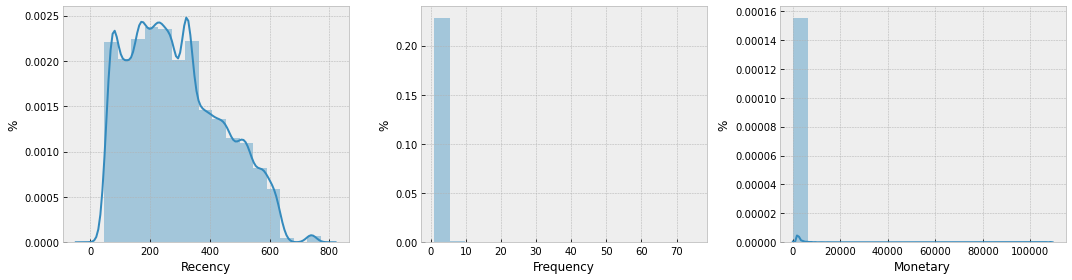

In [13]:
# Application de la fonction histogramme RFM à df
hist_rfm(rfm)

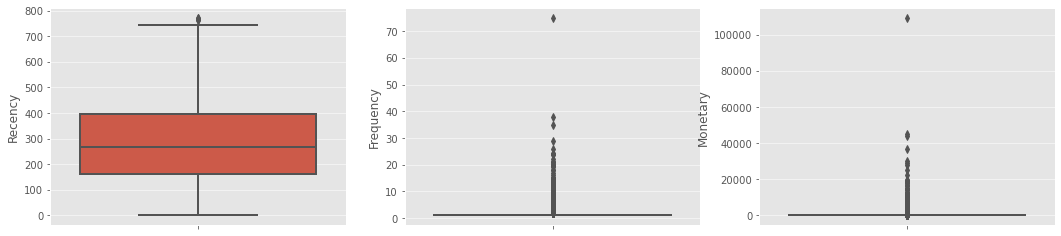

In [14]:
# Application de la fonction boxplot RFM à df
boxplot_rfm(rfm)

In [15]:
def fm_score(x, quintiles, c):
    """
    Attribut une note entre 1 et 5 suivant l'emplacement de x par
    rapport aux quintiles. Plus x est grand, plus la note est grande
    """

    if x <= quintiles[c][.2]:
        return 1
    elif x <= quintiles[c][.4]:
        return 2
    elif x <= quintiles[c][.6]:
        return 3
    elif x <= quintiles[c][.8]:
        return 4
    else:
        return 5

In [16]:
quintiles = rfm[['Recency',
                 'Frequency',
                 'Monetary']].quantile([.2, .4, .6, .8])

In [17]:
rfm['R'] = pd.qcut(rfm['Recency'], 5, ['5','4','3','2','1']).astype(np.int64)

rfm['F'] = rfm['Frequency'].apply(lambda x:
                                      fm_score(x, quintiles, 'Frequency'))

rfm['M'] = pd.qcut(rfm['Monetary'], 5, ['5','4','3','2','1']).astype(np.int64)

In [18]:
def calculSegment(rfm):
    """
    Retourne le segment associé au client en fonction de son score pour les
    variables R, F et M

    Paramètres:
    rfm(pd.DataFrame): doit contenir les colonnes R, F et M

    Return:
    str: Nom du segment
    """

    if 4 <= rfm["R"] <= 5 and 4 <= rfm["F"] <= 5 and 4 <= rfm["M"] <= 5:
        return "Champions"

    elif 3 <= rfm["R"] <= 5 and 3 <= rfm["F"] <= 5 and 2 <= rfm["M"] <= 5:
        return "Loyal Customers"

    elif 3 <= rfm["R"] <= 5 and 1 <= rfm["F"] <= 3 and 1 <= rfm["M"] <= 3:
        return "Potential Loyalist"

    elif rfm["R"] >= 4 and rfm["F"] <= 2:
        return "Recent Customers"

    elif 3 <= rfm["R"] <= 4 and rfm["F"] <= 1 and rfm["M"] <= 1:
        return "Promising"

    elif 2 <= rfm["R"] <= 3 and 2 <= rfm["F"] <= 3 and 2 <= rfm["M"] <= 3:
        return "Need Attention"

    elif 2 <= rfm["R"] <= 3 and rfm["F"] <= 2 and rfm["M"] <= 2:
        return "About To Sleep"

    elif rfm["R"] <= 1 and 4 <= rfm["F"] <= 5 and 4 <= rfm["M"] <= 5:
        return "Can't Lose Them"

    elif rfm["R"] <= 2 and 2 <= rfm["F"] <= 5 and 2 <= rfm["M"] <= 5:
        return "At Risk"

    elif rfm["R"] <= 2 and rfm["F"] <= 2 and rfm["M"] <= 2:
        return "Lost"

    else:
        return "Others"

In [19]:
rfm["RFM Score"] = rfm.apply(calculSegment, axis=1)

In [20]:
rfm.head(5)

Recency  Frequency  Monetary  R  F  M  \
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2      160          1    141.90  4  1  2   
0000b849f77a49e4a4ce2b2a4ca5be3f      163          1     27.19  4  1  5   
0000f46a3911fa3c0805444483337064      585          1     86.22  1  1  4   
0000f6ccb0745a6a4b88665a16c9f078      369          1     43.62  2  1  5   
0004aac84e0df4da2b147fca70cf8255      336          1    196.89  2  1  2   

                                           RFM Score  
customer_unique_id                                    
0000366f3b9a7992bf8c76cfdf3221e2  Potential Loyalist  
0000b849f77a49e4a4ce2b2a4ca5be3f    Recent Customers  
0000f46a3911fa3c0805444483337064              Others  
0000f6ccb0745a6a4b88665a16c9f078              Others  
0004aac84e0df4da2b147fca70cf8255      About To Sleep

In [21]:
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96096 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    96096 non-null  int64  
 1   Frequency  96096 non-null  int64  
 2   Monetary   96096 non-null  float64
 3   R          96096 non-null  int64  
 4   F          96096 non-null  int64  
 5   M          96096 non-null  int64  
 6   RFM Score  96096 non-null  object 
dtypes: float64(1), int64(5), object(1)
memory usage: 5.9+ MB


In [22]:
def projection_2d_segments(data, xlabel, ylabel, label_score, colors) :
    """
    2D scatter plot
    data(pd.DataFrame): contient les 3 colonnes xlabel, ylabel et label_score
    xlabel(str): nom colonne data pour l'axe des x
    ylabel(str): nom colonnne data pour l'axe des y
    label_score: nom méthodologie de la segmentation
    """
    # Pour chaque segment, scatter plot
    for i, segment in enumerate(rfm[label_score].unique()):
        plt.scatter(data[data[label_score] == segment][xlabel],
                    data[data[label_score] == segment][ylabel],
                    label=segment,
                    c=colors[segment]
                   )
    # Titre des axes
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [23]:
categories_1 = ["Champions",
                "Loyal Customers",
                "Potential Loyalist",
                "Recent Customers",
                "Promising",
                "Need Attention",
                "About To Sleep",
                "Can't Lose Them",
                "At Risk",
                "Lost",
                "Others"]

In [24]:
# Liste des couleurs pour chaque segment
palette_1 = sns.color_palette("husl", len(categories_1))
colors_1 = {label: color for label, color in zip(categories_1,
                                                 palette_1.as_hex())}

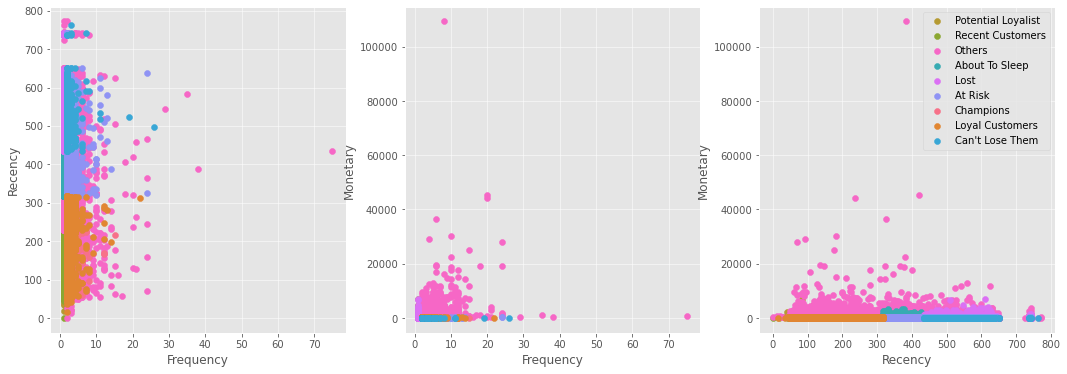

In [25]:
fig = plt.figure(1, figsize=(18, 6))

# 2D plot, Frequency vs Recency
plt.subplot(1, 3, 1)
projection_2d_segments(rfm,
                       "Frequency",
                       "Recency",
                       "RFM Score",
                       colors=colors_1)

# 2D plot, Frequency vs Monetary
plt.subplot(1, 3, 2)
projection_2d_segments(rfm,
                       "Frequency",
                       "Monetary",
                       "RFM Score",
                       colors=colors_1)

# 2D plot, Frequency vs Monetary
plt.subplot(1, 3, 3)
projection_2d_segments(rfm,
                       "Recency",
                       "Monetary",
                       "RFM Score",
                       colors=colors_1)

plt.legend()

plt.show()

Ce type de visualisation ne nous permet de distinguer parfaitement les différents groupes de clients. En effet de par leurs faibles valeurs de Frequency, les groupes se retrouvent agglomérer. Le groupe At Risk semble constrater par rapport aux autres. Enfin le groupe Others est très dispersé.

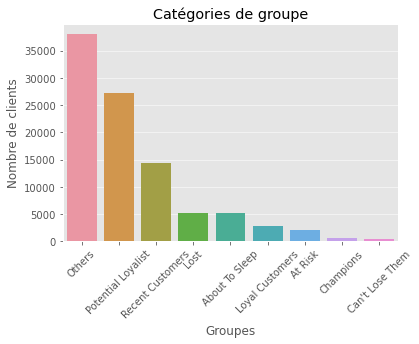

In [26]:
x = list(rfm["RFM Score"].value_counts().index)
y = rfm["RFM Score"].value_counts().values

plt.title("Catégories de groupe")
plt.xlabel("Groupes")
plt.xticks(rotation=45)

plt.ylabel("Nombre de clients")
sns.barplot(x, y)
plt.show()

In [27]:
# Valeurs moyennes par variables et par catégories
column_names = list(rfm.columns)

rfm_mean = pd.DataFrame(columns = column_names)

for i in list(rfm['RFM Score'].unique()):
    rfm_mean = rfm_mean.append((pd.DataFrame(rfm[rfm['RFM Score']==i].mean())).transpose())
    
rfm_mean = rfm_mean.drop(['RFM Score'], axis=1).astype('int64')
rfm_mean = rfm_mean.reset_index()

cat = pd.DataFrame(rfm['RFM Score'].unique())

rfm_mean = rfm_mean.join(cat)
rfm_mean = rfm_mean.rename(columns={0:'Categories'})
rfm_mean = rfm_mean.drop('index', axis = 1)
rfm_mean

Recency  Frequency  Monetary  R  F  M          Categories
0      182          1       228  4  1  2  Potential Loyalist
1      138          1        55  4  1  4    Recent Customers
2      374          1       247  2  1  3              Others
3      366          1       316  2  1  1      About To Sleep
4      526          1       320  1  1  1                Lost
5      435          2       145  1  5  2             At Risk
6      143          2        60  4  5  4           Champions
7      190          2       154  3  5  2     Loyal Customers
8      526          2        59  1  5  4     Can't Lose Them

In [28]:
# Incorporation d'une colonne dummy en vue de la création du parallel coordinates plot
group_vars = rfm_mean['Categories'].unique()
dfg = pd.DataFrame({'Categories':rfm_mean['Categories'].unique()})
dfg['dummy'] = dfg.index
rfm_mean = pd.merge(rfm_mean, dfg, on = 'Categories', how='left')

In [29]:
rfm_mean

Recency  Frequency  Monetary  R  F  M          Categories  dummy
0      182          1       228  4  1  2  Potential Loyalist      0
1      138          1        55  4  1  4    Recent Customers      1
2      374          1       247  2  1  3              Others      2
3      366          1       316  2  1  1      About To Sleep      3
4      526          1       320  1  1  1                Lost      4
5      435          2       145  1  5  2             At Risk      5
6      143          2        60  4  5  4           Champions      6
7      190          2       154  3  5  2     Loyal Customers      7
8      526          2        59  1  5  4     Can't Lose Them      8

In [30]:
# Parallel Coordinates Plots pour la caractérisation des catégories RFM

import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = rfm_mean['dummy'],
                   colorscale = [[0,'red'],[0.1,'blue'],[0.2,'yellow'], [0.3,'green'],[0.4,'darkgreen'],
                                 [0.5,'pink'], [0.6,'purple'],[0.7,'lightblue'],[1,'gold']]), 
    
        
        dimensions = list([
            dict(range = [rfm_mean['Recency'].min(),rfm_mean['Recency'].max()],
                 #constraintrange = [100000,150000],
                 label = "Recency", values = rfm_mean['Recency']),
            
            dict(range=[0,rfm_mean['dummy'].max()],
                       tickvals = dfg['dummy'], ticktext = dfg['Categories'],
                       label='Categories', values=rfm_mean['dummy']),
            
            dict(range = [rfm_mean['Frequency'].min(),rfm_mean['Frequency'].max()],
                 #constraintrange = [100000,150000],
                 label = "Frequency", values = rfm_mean['Frequency']),
        
            dict(range = [rfm_mean['Monetary'].min(),rfm_mean['Monetary'].max()],
                 #constraintrange = [100000,150000],
                 label = "Monetary", values = rfm_mean['Monetary'])])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

## 2. Sélection d'un modèle

Dans cette partie, la segmentation de la base de client est effectuée par l'utilisation d'un modèle de clustering.

La base de données est aggrégé par clients unique. Cependant les variables catégorielles ne pouvant être aggrégés, il est décidé de les retirer.

### 2.1 Aggrégation

In [31]:
# Features à agréger
features = ['review_delay',
            'review_answer_delay',
            'estimated_delivery_time',
            'delivery_time',
            'diff_time_delivery',
            'shipping_time',
            'approval_time',
            'purchase_hour',
            'purchase_year',
            'purchase_month',
            'purchase_day',
            'payment_sequential',
            'freight_value',
            'price',
            'payment_value',
            'order_item_id',
            'product_weight_g',
            'product_photos_qty',
            'product_name_lenght',
            'volume']

In [32]:
# Agrégation par client unique

fonction = lambda x: round(x.mean(), 0) # Fonction permettant d'obtenir une moyenne entière

customer_dataset = df.groupby('customer_unique_id').agg({'review_delay': "mean",
                                                         'review_answer_delay': "mean",
                                                         'estimated_delivery_time': "mean",
                                                         'delivery_time': 'mean',
                                                         'diff_time_delivery': 'mean',
                                                         'shipping_time': 'mean',
                                                         'approval_time': 'mean',

                                                         'purchase_hour': [fonction],
                                                         'purchase_year': [fonction],
                                                         'purchase_month': [fonction],
                                                         'purchase_day': [fonction],
                                                        
                                                         'payment_sequential': "sum",
                                                         'freight_value': "sum",
                                                         'price': 'sum',
                                                         'payment_value': "sum",

                                                         'order_item_id': 'sum',
                                                         'product_weight_g': "mean",
                                                         'product_photos_qty': [fonction],
                                                         'product_name_lenght': [fonction],
                                                         'volume': "mean",
                                                         })

In [33]:
customer_dataset.columns = features

In [86]:
# Incorporation des variables RFM

customer_dataset = customer_dataset.join(rfm[['Recency','Frequency','Monetary','R','F','M']])

In [87]:
customer_dataset.head()

review_delay  review_answer_delay  \
customer_unique_id                                                    
0000366f3b9a7992bf8c76cfdf3221e2      6.544132             4.572778   
0000b849f77a49e4a4ce2b2a4ca5be3f      3.533715             0.937095   
0000f46a3911fa3c0805444483337064     26.121493             1.055370   
0000f6ccb0745a6a4b88665a16c9f078     20.146053             1.012396   
0004aac84e0df4da2b147fca70cf8255     13.176597             4.937211   

                                  estimated_delivery_time  delivery_time  \
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2                10.533819       6.400914   
0000b849f77a49e4a4ce2b2a4ca5be3f                 7.232130       2.984005   
0000f46a3911fa3c0805444483337064                27.121493      25.731759   
0000f6ccb0745a6a4b88665a16c9f078                31.132442      20.023472   
0004aac84e0df4da2b147fca70cf8255                20.161898      13.126435   

                                  diff_time_delivery  shipping_time  \
customer_unique_id                                                    
0000366f3b9a7992bf8c76cfdf3221e2           -4.132905       3.120347   
0000b849f77a49e4a4ce2b2a4ca5be3f           -4.248125       2.235104   
0000f46a3911fa3c0805444483337064           -1.389734       2.337882   
0000f6ccb0745a6a4b88665a16c9f078          -11.108970       5.070116   
0004aac84e0df4da2b147fca70cf8255           -7.035463       6.010208   

                                  approval_time  purchase_hour  purchase_year  \
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2       0.010313             10           2018   
0000b849f77a49e4a4ce2b2a4ca5be3f       0.301586             11           2018   
0000f46a3911fa3c0805444483337064       0.000000             21           2017   
0000f6ccb0745a6a4b88665a16c9f078       0.013611             20           2017   
0004aac84e0df4da2b147fca70cf8255       0.014699             19           2017   

                                  purchase_month  purchase_day  \
customer_unique_id                                               
0000366f3b9a7992bf8c76cfdf3221e2               5            10   
0000b849f77a49e4a4ce2b2a4ca5be3f               5             7   
0000f46a3911fa3c0805444483337064               3            10   
0000f6ccb0745a6a4b88665a16c9f078              10            12   
0004aac84e0df4da2b147fca70cf8255              11            14   

                                  payment_sequential  freight_value   price  \
customer_unique_id                                                            
0000366f3b9a7992bf8c76cfdf3221e2                 1.0          12.00  129.90   
0000b849f77a49e4a4ce2b2a4ca5be3f                 1.0           8.29   18.90   
0000f46a3911fa3c0805444483337064                 1.0          17.22   69.00   
0000f6ccb0745a6a4b88665a16c9f078                 1.0          17.63   25.99   
0004aac84e0df4da2b147fca70cf8255                 1.0          16.89  180.00   

                                  payment_value  order_item_id  \
customer_unique_id                                               
0000366f3b9a7992bf8c76cfdf3221e2         141.90            1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f          27.19            1.0   
0000f46a3911fa3c0805444483337064          86.22            1.0   
0000f6ccb0745a6a4b88665a16c9f078          43.62            1.0   
0004aac84e0df4da2b147fca70cf8255         196.89            1.0   

                                  product_weight_g  product_photos_qty  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2            1500.0                 1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f             375.0                 1.0   
0000f46a3911fa3c0805444483337064            1500.0                 3.0   
0000f6ccb0745a6a4b88665a16c9f078             150.0                 5.0   
0004aac84e0df

In [88]:
customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96096 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   review_delay             96096 non-null  float64
 1   review_answer_delay      96096 non-null  float64
 2   estimated_delivery_time  95997 non-null  float64
 3   delivery_time            93343 non-null  float64
 4   diff_time_delivery       93343 non-null  float64
 5   shipping_time            94465 non-null  float64
 6   approval_time            95997 non-null  float64
 7   purchase_hour            96096 non-null  int64  
 8   purchase_year            96096 non-null  int64  
 9   purchase_month           96096 non-null  int64  
 10  purchase_day             96096 non-null  int64  
 11  payment_sequential       96096 non-null  float64
 12  freight_value            96096 non-null  float64
 13  price                  

### 2.2 Sélection d'un échantillon

In [89]:
# Sélection d'un échantillon (5% de customer_dataset)
sample = customer_dataset.sample(frac=.05)

In [90]:
sample.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4805 entries, 1734eaee5f45a8f811841efba80b1a6e to 9c9f02b5c53391f4313ffe0dff1ba387
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   review_delay             4805 non-null   float64
 1   review_answer_delay      4805 non-null   float64
 2   estimated_delivery_time  4800 non-null   float64
 3   delivery_time            4680 non-null   float64
 4   diff_time_delivery       4680 non-null   float64
 5   shipping_time            4729 non-null   float64
 6   approval_time            4800 non-null   float64
 7   purchase_hour            4805 non-null   int64  
 8   purchase_year            4805 non-null   int64  
 9   purchase_month           4805 non-null   int64  
 10  purchase_day             4805 non-null   int64  
 11  payment_sequential       4805 non-null   float64
 12  freight_value            4805 non-null   float64
 13  price                   

In [91]:
sample.head()

review_delay  review_answer_delay  \
customer_unique_id                                                    
1734eaee5f45a8f811841efba80b1a6e      6.126111             1.343831   
030d75f71f5db22bf54db16fc57bae5e     13.251782             0.748403   
4c02484da9f8d77218343a54f5f9158d      6.087616             1.867836   
46298e3a5aebca6fd516a2a13401c0cd      3.120764             1.571007   
9cc73b2f1f13d58e4e11389fde3e2402      5.015336            14.000660   

                                  estimated_delivery_time  delivery_time  \
customer_unique_id                                                         
1734eaee5f45a8f811841efba80b1a6e                13.114352       6.046759   
030d75f71f5db22bf54db16fc57bae5e                17.246238      13.036944   
4c02484da9f8d77218343a54f5f9158d                17.076296       5.873519   
46298e3a5aebca6fd516a2a13401c0cd                 5.108160       3.071829   
9cc73b2f1f13d58e4e11389fde3e2402                17.001568       4.930851   

                                  diff_time_delivery  shipping_time  \
customer_unique_id                                                    
1734eaee5f45a8f811841efba80b1a6e           -7.067593       3.304398   
030d75f71f5db22bf54db16fc57bae5e           -4.209294      -0.808044   
4c02484da9f8d77218343a54f5f9158d          -11.202778       5.071620   
46298e3a5aebca6fd516a2a13401c0cd           -2.036331       4.227257   
9cc73b2f1f13d58e4e11389fde3e2402          -12.070718       4.973084   

                                  approval_time  purchase_hour  purchase_year  \
customer_unique_id                                                              
1734eaee5f45a8f811841efba80b1a6e       0.011759             20           2018   
030d75f71f5db22bf54db16fc57bae5e       0.005544             17           2018   
4c02484da9f8d77218343a54f5f9158d       0.011319             21           2017   
46298e3a5aebca6fd516a2a13401c0cd       0.012604             21           2018   
9cc73b2f1f13d58e4e11389fde3e2402       0.013767             11           2018   

                                  purchase_month  purchase_day  \
customer_unique_id                                               
1734eaee5f45a8f811841efba80b1a6e               5             8   
030d75f71f5db22bf54db16fc57bae5e               8            10   
4c02484da9f8d77218343a54f5f9158d               9            14   
46298e3a5aebca6fd516a2a13401c0cd               8            21   
9cc73b2f1f13d58e4e11389fde3e2402               8            13   

                                  payment_sequential  freight_value   price  \
customer_unique_id                                                            
1734eaee5f45a8f811841efba80b1a6e                 1.0           9.59  175.92   
030d75f71f5db22bf54db16fc57bae5e                 1.0          28.03  150.00   
4c02484da9f8d77218343a54f5f9158d                 1.0          13.65   89.90   
46298e3a5aebca6fd516a2a13401c0cd                 1.0           7.94   96.99   
9cc73b2f1f13d58e4e11389fde3e2402                 2.0          33.84  203.99   

                                  payment_value  order_item_id  \
customer_unique_id                                               
1734eaee5f45a8f811841efba80b1a6e         185.51            1.0   
030d75f71f5db22bf54db16fc57bae5e         178.03            1.0   
4c02484da9f8d77218343a54f5f9158d         103.55            1.0   
46298e3a5aebca6fd516a2a13401c0cd         104.93            1.0   
9cc73b2f1f13d58e4e11389fde3e2402         237.83            2.0   

                                  product_weight_g  product_photos_qty  \
customer_unique_id                                                       
1734eaee5f45a8f811841efba80b1a6e             700.0                 4.0   
030d75f71f5db22bf54db16fc57bae5e            4000.0                 1.0   
4c02484da9f8d77218343a54f5f9158d            1350.0                 1.0   
46298e3a5aebca6fd516a2a13401c0cd             100.0                 1.0   
9cc73b2f1f13d

### 2.3 Preprocessing

In [92]:
# Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor

# Imputers
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import SimpleImputer


# Transformers
from category_encoders.target_encoder import TargetEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

In [93]:
# Séparation en features numériques et catégorielles
numerical_features = sample.select_dtypes(include=['int64', 'float64']).columns
categorical_features = sample.select_dtypes(include=['object', 'bool']).columns

In [94]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', QuantileTransformer(random_state=42, output_distribution='uniform')),  
])

'''QuantileTransformer

   This method transforms the features to follow a uniform or a normal distribution. 
   Therefore, for a given feature, this transformation tends to spread out the most frequent values. 
   It also reduces the impact of (marginal) outliers: this is therefore a robust preprocessing scheme.
'''

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
    ])

In [95]:
preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [96]:
# Application du pipeline
sample_scaled = preprocessing_pipeline.fit_transform(sample)
sample_scaled = pd.DataFrame(sample_scaled, index = sample.index, columns = sample.columns)

### 2.4 Visualisation des variables preprocessed

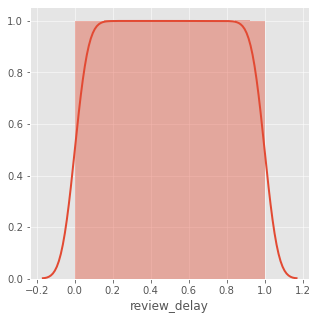

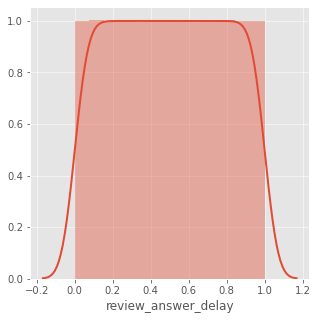

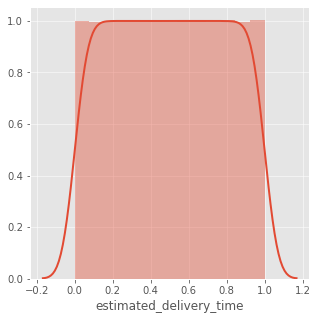

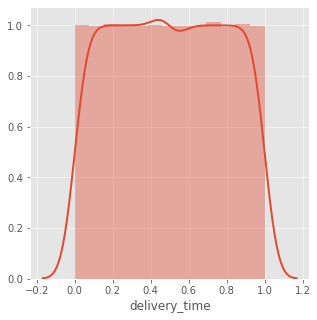

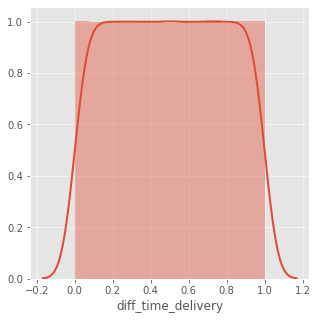

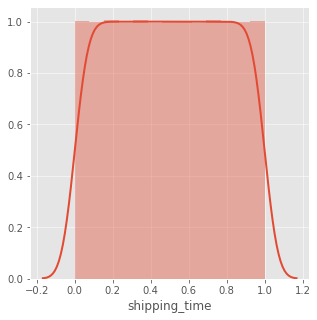

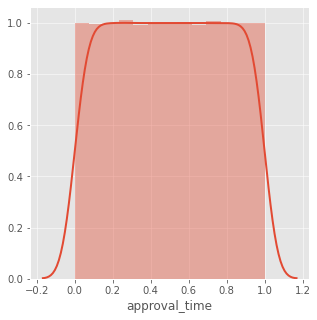

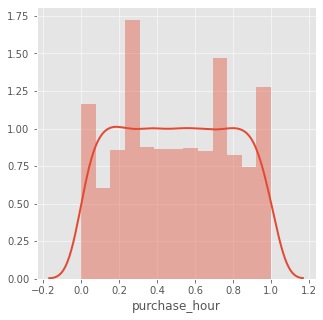

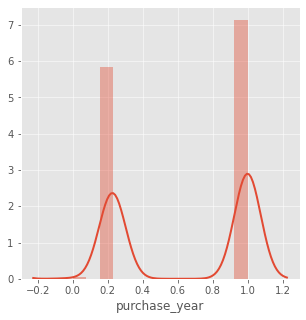

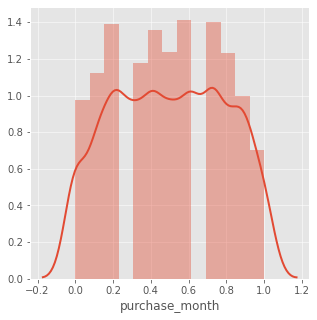

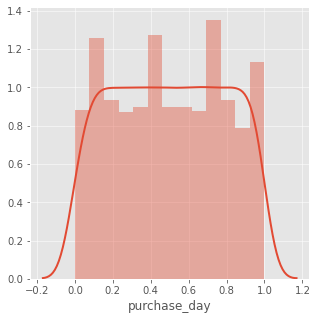

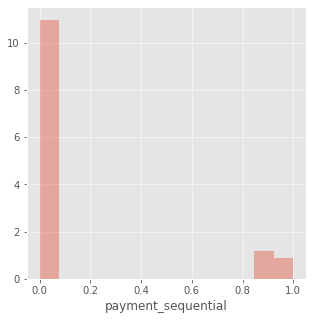

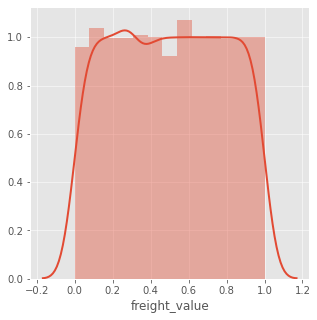

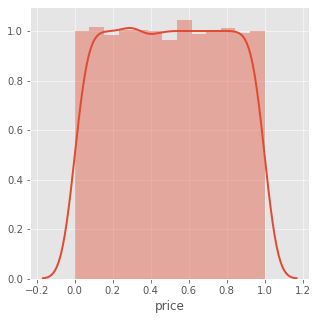

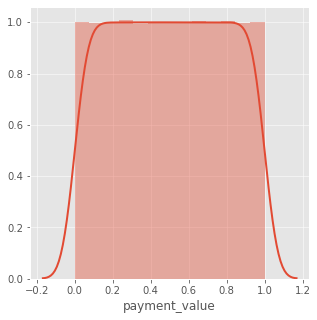

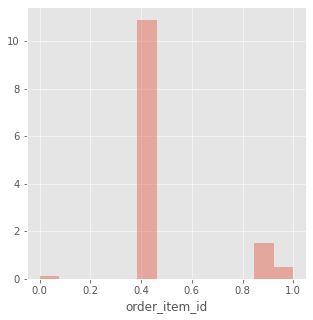

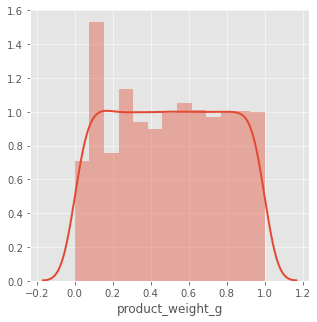

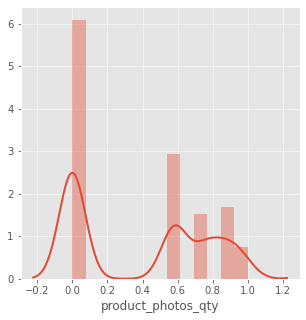

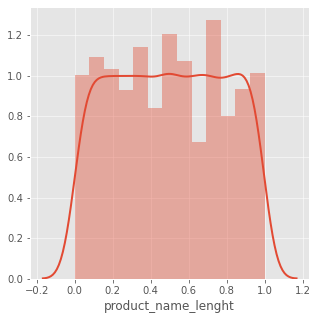

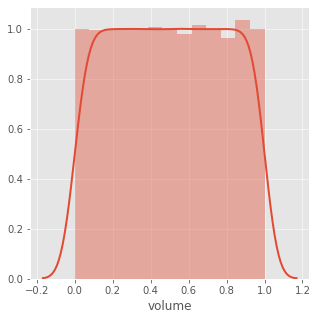

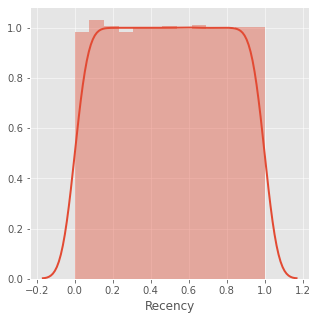

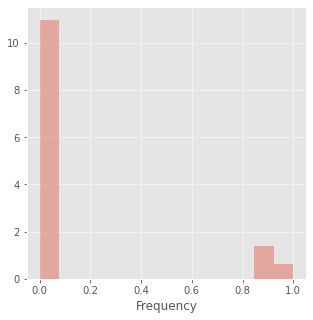

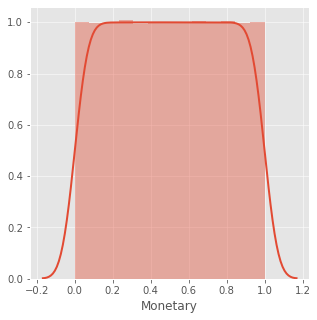

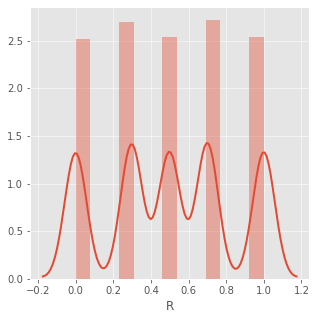

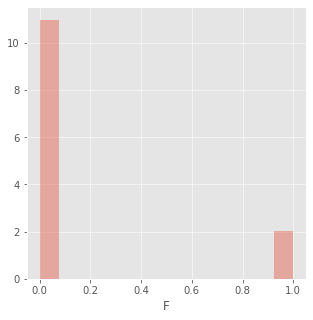

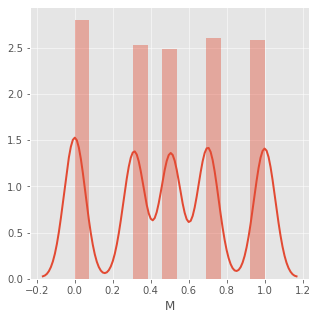

In [97]:
for i in list(sample_scaled.columns):
    plt.figure(figsize=(5, 5))
    plt.style.use('ggplot')
    sns.distplot(sample_scaled[i], bins=int(1 + np.log2(len(sample_scaled[i]))))

In [98]:
sample_scaled.head()

review_delay  review_answer_delay  \
customer_unique_id                                                    
1734eaee5f45a8f811841efba80b1a6e      0.182882             0.352947   
030d75f71f5db22bf54db16fc57bae5e      0.612708             0.078841   
4c02484da9f8d77218343a54f5f9158d      0.179638             0.529565   
46298e3a5aebca6fd516a2a13401c0cd      0.039531             0.453453   
9cc73b2f1f13d58e4e11389fde3e2402      0.114636             0.980195   

                                  estimated_delivery_time  delivery_time  \
customer_unique_id                                                         
1734eaee5f45a8f811841efba80b1a6e                 0.111285       0.223669   
030d75f71f5db22bf54db16fc57bae5e                 0.228638       0.663676   
4c02484da9f8d77218343a54f5f9158d                 0.222059       0.212287   
46298e3a5aebca6fd516a2a13401c0cd                 0.007936       0.062366   
9cc73b2f1f13d58e4e11389fde3e2402                 0.220224       0.148435   

                                  diff_time_delivery  shipping_time  \
customer_unique_id                                                    
1734eaee5f45a8f811841efba80b1a6e            0.734855       0.514417   
030d75f71f5db22bf54db16fc57bae5e            0.841526       0.050620   
4c02484da9f8d77218343a54f5f9158d            0.533502       0.731490   
46298e3a5aebca6fd516a2a13401c0cd            0.885878       0.606515   
9cc73b2f1f13d58e4e11389fde3e2402            0.476776       0.709530   

                                  approval_time  purchase_hour  purchase_year  \
customer_unique_id                                                              
1734eaee5f45a8f811841efba80b1a6e       0.421922       0.812813       1.000000   
030d75f71f5db22bf54db16fc57bae5e       0.031031       0.635636       1.000000   
4c02484da9f8d77218343a54f5f9158d       0.399900       0.873373       0.227227   
46298e3a5aebca6fd516a2a13401c0cd       0.451451       0.873373       1.000000   
9cc73b2f1f13d58e4e11389fde3e2402       0.483740       0.235235       1.000000   

                                  purchase_month  purchase_day  \
customer_unique_id                                               
1734eaee5f45a8f811841efba80b1a6e        0.410911      0.253754   
030d75f71f5db22bf54db16fc57bae5e        0.720721      0.321321   
4c02484da9f8d77218343a54f5f9158d        0.797297      0.453453   
46298e3a5aebca6fd516a2a13401c0cd        0.720721      0.694194   
9cc73b2f1f13d58e4e11389fde3e2402        0.720721      0.419920   

                                  payment_sequential  freight_value     price  \
customer_unique_id                                                              
1734eaee5f45a8f811841efba80b1a6e            0.000000       0.108324  0.762262   
030d75f71f5db22bf54db16fc57bae5e            0.000000       0.774761  0.711712   
4c02484da9f8d77218343a54f5f9158d            0.000000       0.232390  0.494494   
46298e3a5aebca6fd516a2a13401c0cd            0.000000       0.055055  0.520521   
9cc73b2f1f13d58e4e11389fde3e2402            0.888388       0.825749  0.818593   

                                  payment_value  order_item_id  \
customer_unique_id                                               
1734eaee5f45a8f811841efba80b1a6e       0.700485       0.426426   
030d75f71f5db22bf54db16fc57bae5e       0.685672       0.426426   
4c02484da9f8d77218343a54f5f9158d       0.457457       0.426426   
46298e3a5aebca6fd516a2a13401c0cd       0.462383       0.426426   
9cc73b2f1f13d58e4e11389fde3e2402       0.781622       0.864865   

                                  product_weight_g  product_photos_qty  \
customer_unique_id                                                       
1734eaee5f45a8f811841efba80b1a6e          0.514515            0.853353   
030d75f71f5db22bf54db16fc57bae5e          0.859860            0.000000   
4c02484da9f8d77218343a54f5f9158d          0.674174            0.000000   
46298e3a5aebca6fd516a2a13401c0cd          0.027027            0.000000   

### 2.5 Test de plusieurs méthodes de réduction dimensionnelle

In [99]:
from sklearn.decomposition import PCA
import umap
from sklearn.manifold import TSNE
from sklearn.manifold import Isomap

# dictionnaire de reducers
dict_reducer = {
    'PCA' : PCA(),
    'Isomap' : Isomap(n_jobs=-1),
    'UMAP' : umap.UMAP(),
    'TSNE' : TSNE()
}

In [100]:
# Fonction permettant de tester plusieurs reducers sur un même dataframe
def dimensionality_reduction(data_scaled, reducer):
    reducer = reducer
    
    if reducer == PCA():
        
        cum_expl_var_ratio = np.cumsum(reducer.explained_variance_ratio_)
        num_components = len(cum_expl_var_ratio[cum_expl_var_ratio <= 0.8])

        # rerun PCA with components that explain 80% of the variance
        pca = PCA(num_components).fit(data_scaled)
        data_pca = pca.transform(data_scaled)
        data_pca = pd.DataFrame(data_pca)
        data_reduced = data_pca
        return data_reduced
        
    else :
        
        data_reduced = reducer.fit_transform(data_scaled)
        return data_reduced

In [101]:
# Dictionnaire de dataframes réduits
dict_data_reduced = {}

for name_reducer, reducer in dict_reducer.items():
    dict_data_reduced[name_reducer] = dimensionality_reduction(sample_scaled, reducer)

In [102]:
dict_data_reduced

{'PCA': array([[-1.09650476e-01, -5.70740515e-01, -2.79326757e-01, ...,
         -8.10964897e-04,  5.93736341e-04, -3.15032361e-16],
        [ 2.43409998e-01, -6.31845391e-01, -7.19308368e-01, ...,
         -5.09498315e-03,  1.37914427e-03,  1.86332819e-16],
        [-3.37510202e-01,  4.28674375e-01,  8.14453697e-02, ...,
          4.16157552e-03, -2.43943277e-03, -3.05018148e-16],
        ...,
        [-8.82841100e-02, -4.54667568e-01, -3.51436403e-01, ...,
         -3.69685837e-03,  1.89224119e-03, -1.19233720e-17],
        [ 3.58543423e-01,  8.11039060e-01, -6.11362199e-01, ...,
         -7.60900924e-03,  3.39540647e-03, -1.74309754e-17],
        [-2.11475003e-01, -4.34634641e-01, -2.34174623e-01, ...,
         -2.21287668e-03, -1.06047385e-03, -1.05755438e-17]]),
 'Isomap': array([[0.01335954, 0.34795291],
        [0.00778098, 1.20168641],
        [0.01403511, 0.00687266],
        ...,
        [0.01177612, 0.26339263],
        [0.00498909, 0.00132583],
        [0.00903028, 0.695129

### 2.6 Projection 2D dans les nouveaux plans réduits

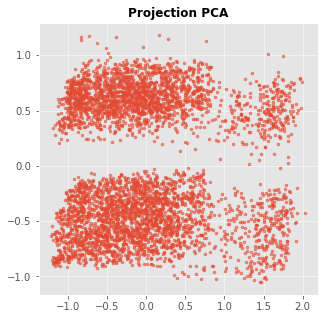

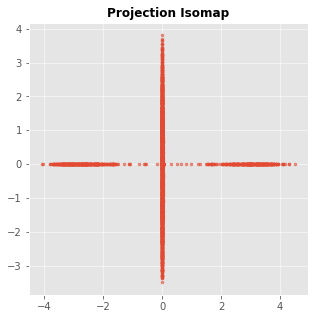

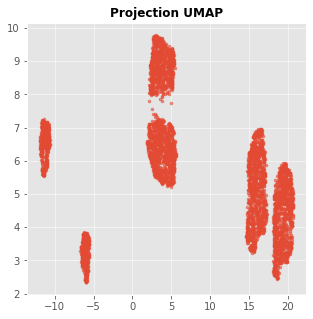

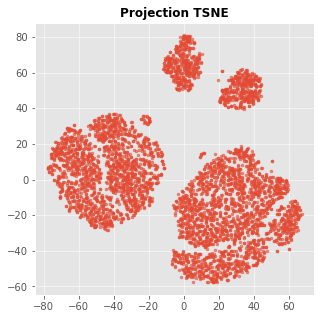

In [103]:
for name_reducer, data_reduced in dict_data_reduced.items():

    df_reduced = pd.DataFrame(dict_data_reduced[name_reducer])

    plt.figure(figsize=(5, 5))
    plt.scatter(df_reduced.loc[:, 0], df_reduced.loc[:, 1], alpha=0.6, marker='.')
    plt.title('Projection {}'.format(name_reducer), fontsize=12, weight='bold')
    
    plt.show()

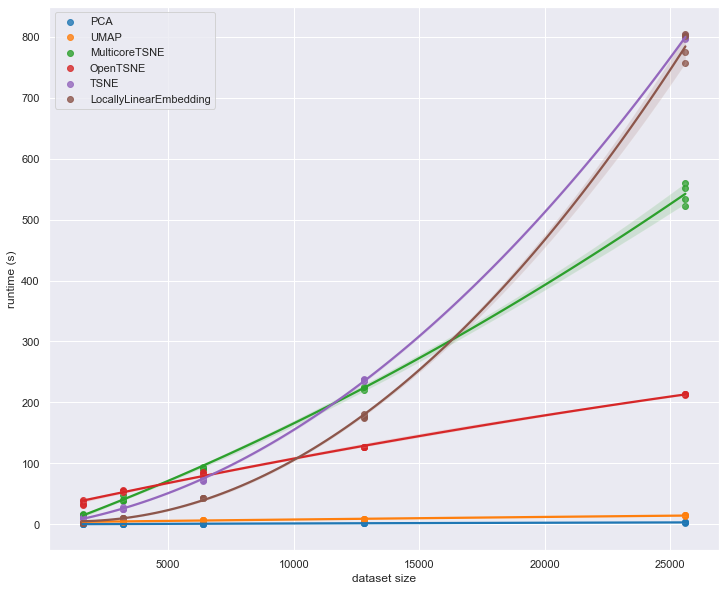

La réduction du dataframe avec UMAP génère les clusters denses et séparés. De plus d'après les courbes de performance issues de la documentation il est aussi le plus rapide avec PCA.

In [104]:
reducer = umap.UMAP()
sample_umap = reducer.fit_transform(sample_scaled)

## 3. Modèles de clustering

Dans cette partie, deux modèle de clusterings sont comparées : K-Means et MiniBatchKMeans.
    
Afin de déterminer le nombre optimale de clusters il est nécessaire de calculer plusieurs métriques :
    
   - l'inertie : mesure le degré de cohérence interne des clusters en minimisant la carré de la distance entre le centroide du cluster et ses points
   - Coefficient de Davies Bouldin : mesure le ratio entre la distance au sein des clusters et la distance entre les clusters
   - Coefficient de Calinski Harabasz : similaire au précédent
   - Score de Silhouette : la moyenne du coefficient de silhouette pour tous les points, c'est à dire la différence entre la distance moyenne avec les points du même groupe que lui (cohésion) et la distance moyenne avec les points des autres groupes voisins (séparation)

L'indice de Calinski-Harabasz varie entre 0 (pire classification) et + l'infini (meilleure classification). Il dépend fortement de N, nombre de points dans l'échantillon. Toutes choses égales par ailleurs, il croit linéairement avec N. Par conséquent, son ordre de grandeur peut varier considérablement d'un jeu de données à l'autre.

L'indice de Davies-Bouldin varie entre 0 (meilleure classification) et + l'infini (pire classification).

Le coefficient de silhouette varie entre -1 (pire classification) et 1 (meilleure classification).

La courbe d'inertie (WSSE) forme un coude qui indique le nombre optimale de clusters à sélectionner lorsque l'inertie se stabilise.

### 3.1 K-Means - UMAP : Metrics

In [105]:
from sklearn.cluster import KMeans

In [106]:

from sklearn.metrics import davies_bouldin_score,silhouette_score, silhouette_samples
from sklearn.metrics import calinski_harabasz_score

# Métriques de clusterings pour différentes valeurs de n_clusters
sse, db, ch, slc = {}, {}, {}, {}
for k in range(2, 10):
    # seed of 10 for reproducibility.
    kmeans = KMeans(init='k-means++', n_clusters=k, max_iter=1000,random_state=10).fit(sample_umap)
    #if k == 3: labels = kmeans.labels_
    clusters = kmeans.labels_
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(sample_umap,clusters)
    ch[k] = calinski_harabasz_score(sample_umap,clusters)
    slc[k] = silhouette_score(sample_umap,clusters)

Text(0, 0.5, 'Calinski Harabasz score')

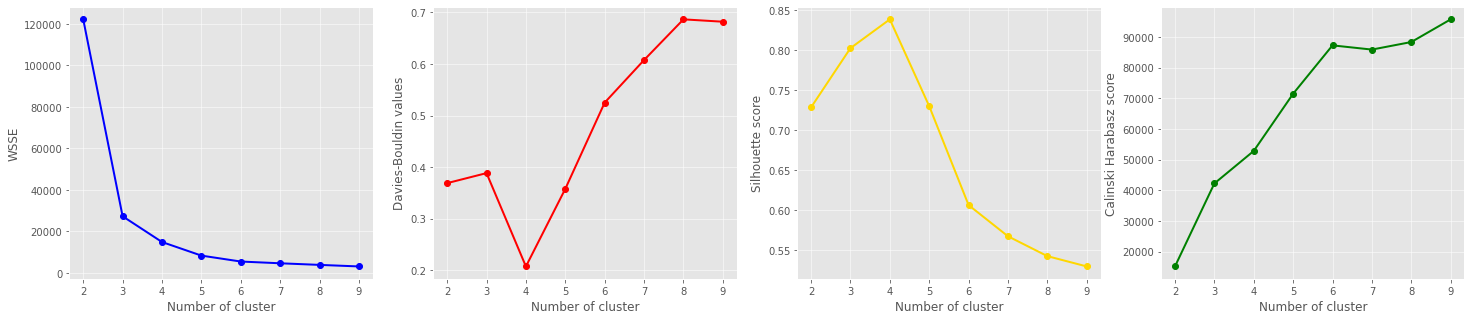

In [107]:
# Graphiques pour chaque métriques

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (25, 5))

ax1.plot(list(sse.keys()), list(sse.values()), color="blue", marker='o')
ax1.set_xlabel("Number of cluster")
ax1.set_ylabel("WSSE")

ax2.plot(list(db.keys()), list(db.values()), color="red", marker='o')
ax2.set_xlabel("Number of cluster")
ax2.set_ylabel("Davies-Bouldin values")

ax3.plot(list(slc.keys()), list(slc.values()), color="gold", marker='o')
ax3.set_xlabel("Number of cluster")
ax3.set_ylabel("Silhouette score")

ax4.plot(list(ch.keys()), list(ch.values()), color="green", marker='o')
ax4.set_xlabel("Number of cluster")
ax4.set_ylabel("Calinski Harabasz score")

Les 4 graphiques ci-dessus permettent de visualiser l'évolution de chaque métrique en fonction du nombre de clusters.
Chaque plot indique un nombre optimale de clusters différents. Ce nombre semble être 3. Cependant trois paraît assez faible. Pour certains plots un changement dans l'évolution des métriques est observé à n_cluster =6.

Sans pouvoir visualiser les clusters dans un scatter plot il reste difficile de faire un choix. Cependant on verra par la suite après avoir plotter les points un certain nombre de clusters distincts se matérialisent.  

Par la suite nous nous baserons sur le Silhouette score car il est plus intuitif, compris entre -1 et 1 et enfin la comparaison est aisé entre un scatter plot où tous les clusters sont labellisés et diagramme de silhouette.

### 3.2 K-Means - UMAP : Silhouettes Plots

For n_clusters = 2 The average silhouette_score is : 0.7286888
For n_clusters = 3 The average silhouette_score is : 0.80273145
For n_clusters = 4 The average silhouette_score is : 0.83873075
For n_clusters = 5 The average silhouette_score is : 0.73018074
For n_clusters = 6 The average silhouette_score is : 0.6065102
For n_clusters = 7 The average silhouette_score is : 0.56751734
For n_clusters = 8 The average silhouette_score is : 0.54269636
For n_clusters = 9 The average silhouette_score is : 0.52980804


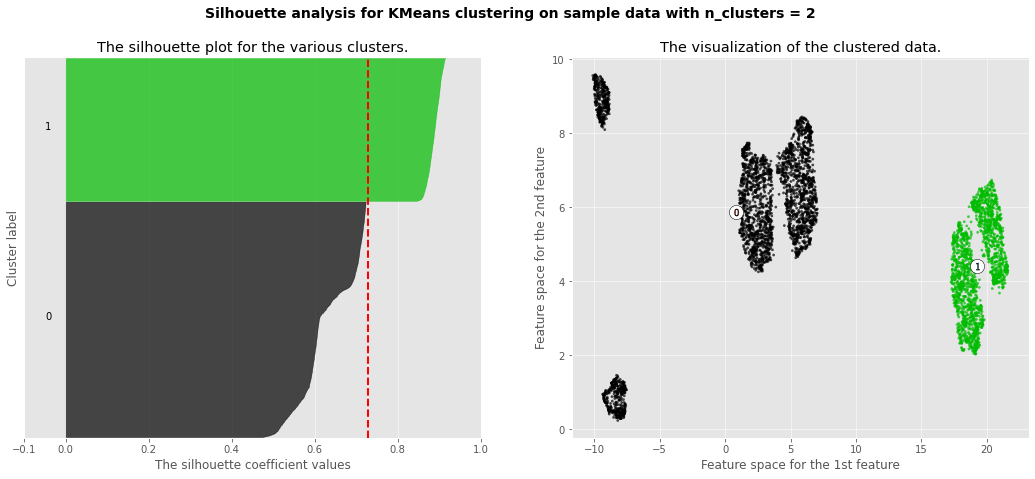

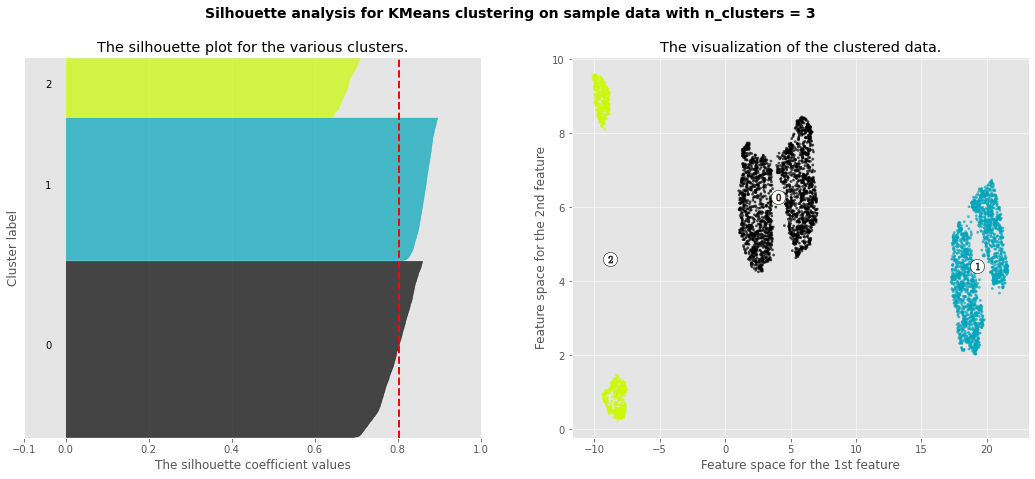

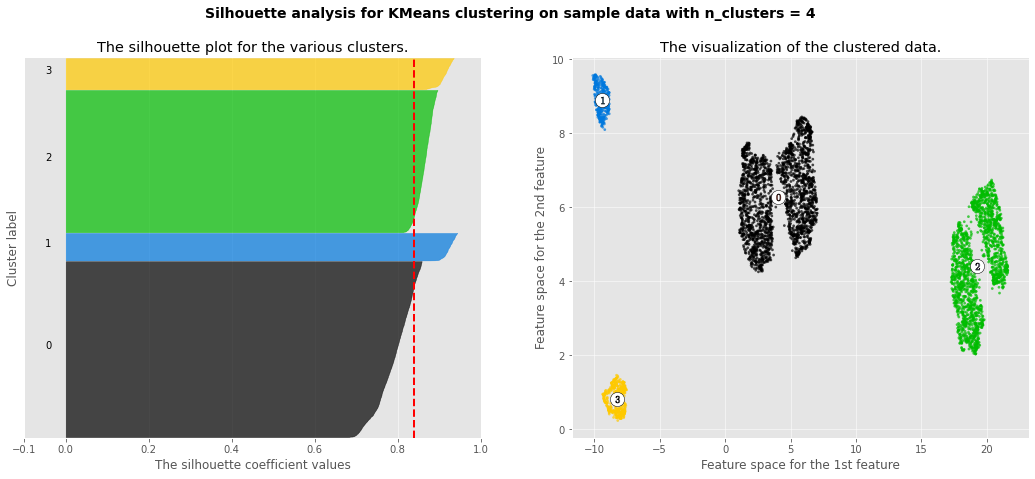

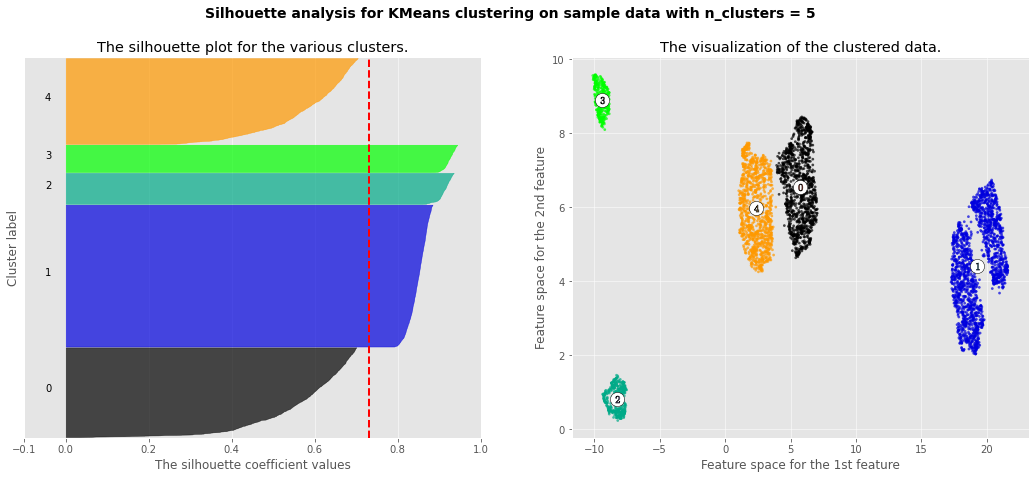

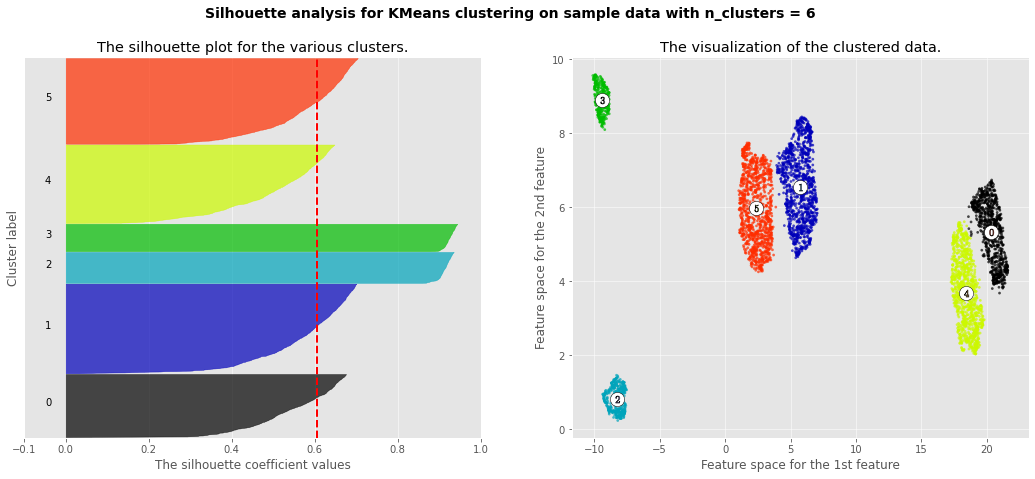

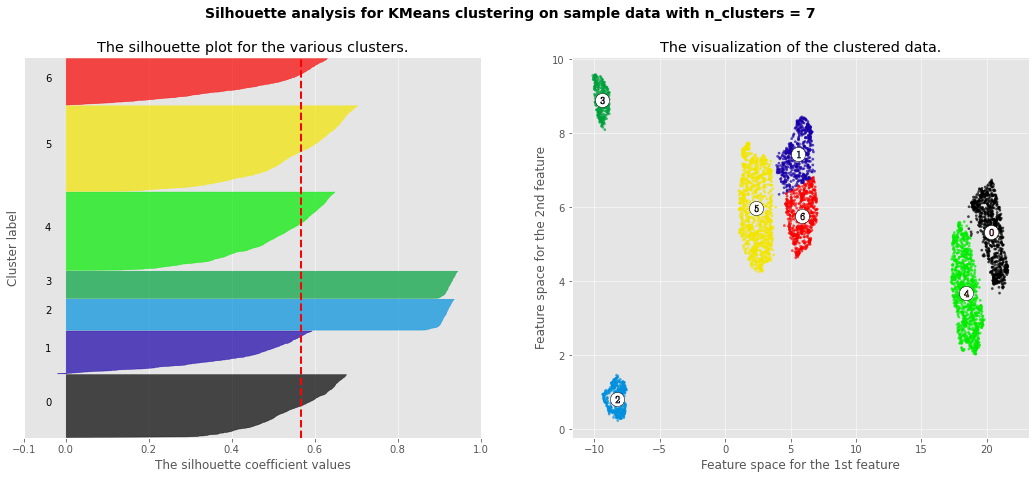

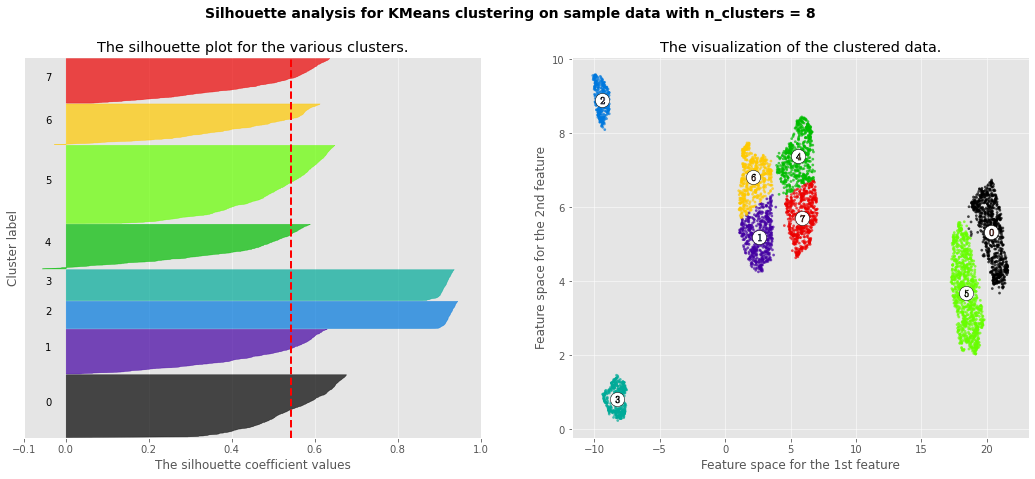

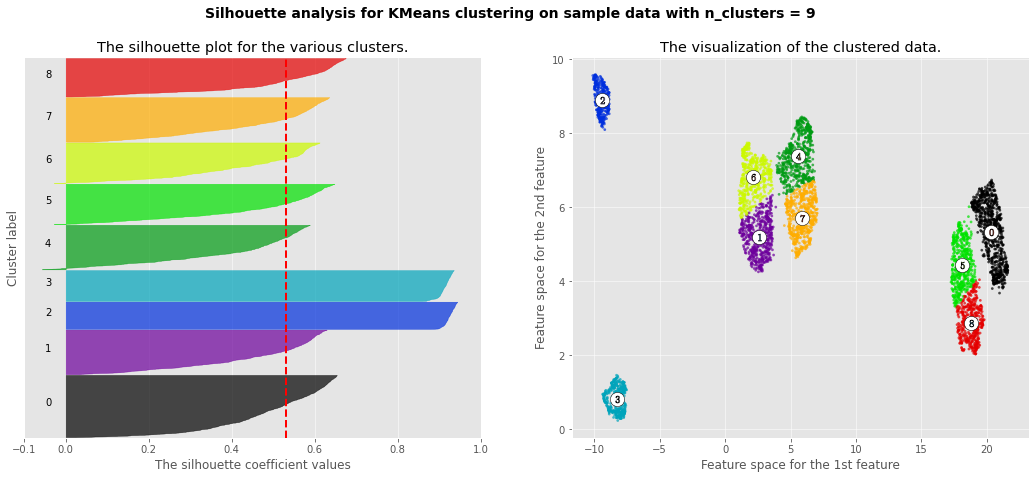

In [108]:
import matplotlib.cm as cm

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:

    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    ax1.set_xlim([-0.1, 1])

    ax1.set_ylim([0, len(sample_umap) + (n_clusters + 1) * 10])

    clusterer = KMeans(n_clusters=n_clusters, random_state=10, init='k-means++', max_iter=1000)
    cluster_labels = clusterer.fit_predict(sample_umap)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(sample_umap, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(sample_umap, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(sample_umap[:, 0], sample_umap[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [109]:
# Subset du dictionnaire slc où les valeurs de clé sont supérieurs ou égales à 4
# subset_slc = {key: value for key, value in slc.items() if key >= 4}

In [110]:
# Modèle KMeans avec coefficient de Silhouette maximal
#n_cluster_KMean = list(slc.keys())[list(slc.values()).index(max(slc.values()))]
#print('Nombre optimale = {}'.format(n_cluster_KMean))

n_cluster_KMean = 6

Pour n_clusters = 6 l'attribution des clusters est optimisée, leurs tailles respectives semblent équilibrées. De plus ils sont bien séparés les uns des autres.

### 3.3 MiniBatchKMeans - UMAP : Metrics

In [111]:
from sklearn.cluster import MiniBatchKMeans

# Métriques de clusterings pour différentes valeurs de n_clusters

sse, db, ch, slc = {}, {}, {}, {}
for k in range(2, 10):
    # seed of 10 for reproducibility.
    mbk = MiniBatchKMeans(init='k-means++', n_clusters=k, max_iter=1000,random_state=10).fit(sample_umap)
    #if k == 3: labels = kmeans.labels_
    clusters = mbk.labels_
    sse[k] = mbk.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
    db[k] = davies_bouldin_score(sample_umap,clusters)
    ch[k] = calinski_harabasz_score(sample_umap,clusters)
    slc[k] = silhouette_score(sample_umap,clusters)

Text(0, 0.5, 'CH score')

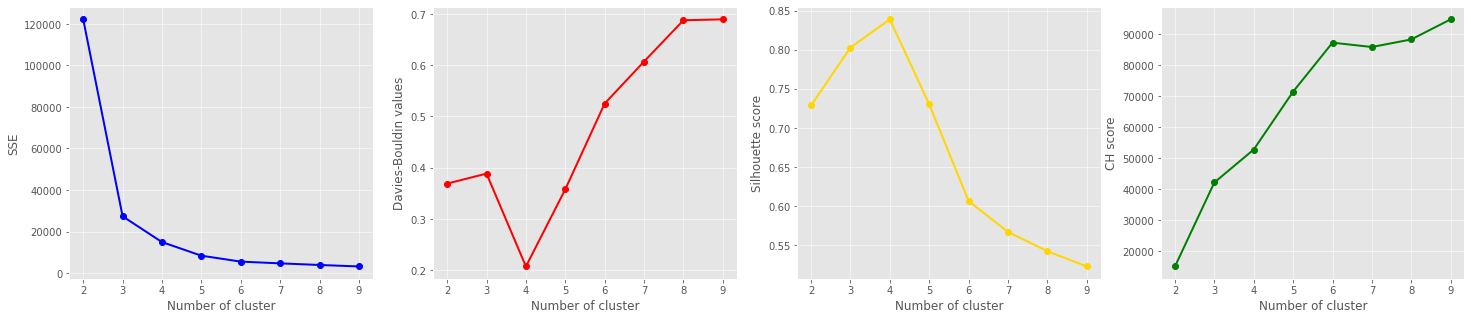

In [112]:
# Graphiques pour chaque métriques

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4, figsize = (25, 5))

ax1.plot(list(sse.keys()), list(sse.values()), color="blue", marker='o')
ax1.set_xlabel("Number of cluster")
ax1.set_ylabel("SSE")

ax2.plot(list(db.keys()), list(db.values()), color="red", marker='o')
ax2.set_xlabel("Number of cluster")
ax2.set_ylabel("Davies-Bouldin values")

ax3.plot(list(slc.keys()), list(slc.values()), color="gold", marker='o')
ax3.set_xlabel("Number of cluster")
ax3.set_ylabel("Silhouette score")

ax4.plot(list(ch.keys()), list(ch.values()), color="green", marker='o')
ax4.set_xlabel("Number of cluster")
ax4.set_ylabel("CH score")

### 3.4 MiniBatchKMeans - UMAP : Silhouettes Plots

For n_clusters = 2 The average silhouette_score is : 0.7286888
For n_clusters = 3 The average silhouette_score is : 0.80273145
For n_clusters = 4 The average silhouette_score is : 0.83873075
For n_clusters = 5 The average silhouette_score is : 0.73018074
For n_clusters = 6 The average silhouette_score is : 0.6065102
For n_clusters = 7 The average silhouette_score is : 0.567013
For n_clusters = 8 The average silhouette_score is : 0.5423803
For n_clusters = 9 The average silhouette_score is : 0.5228986


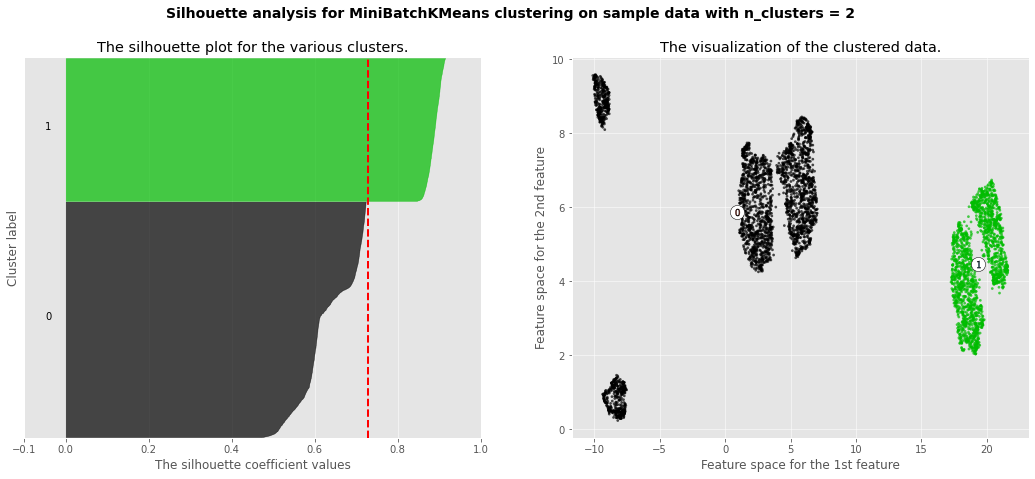

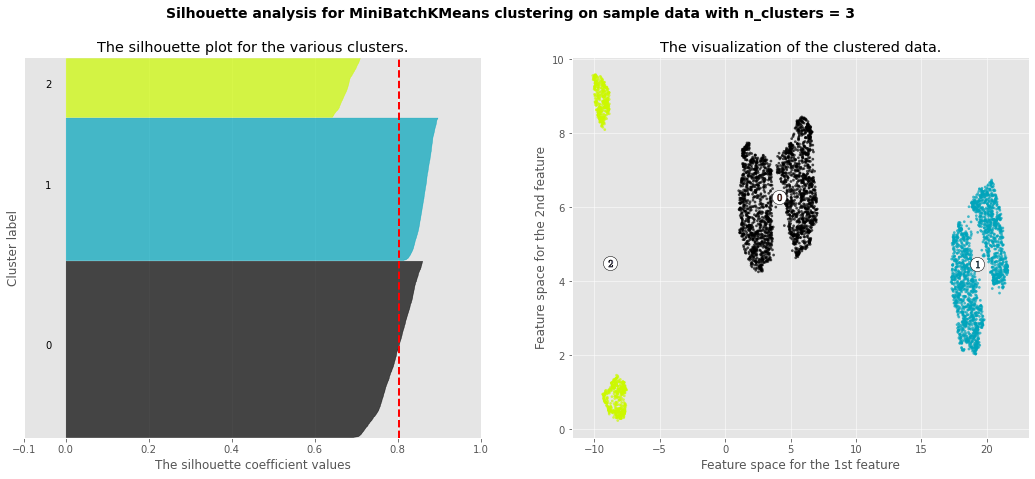

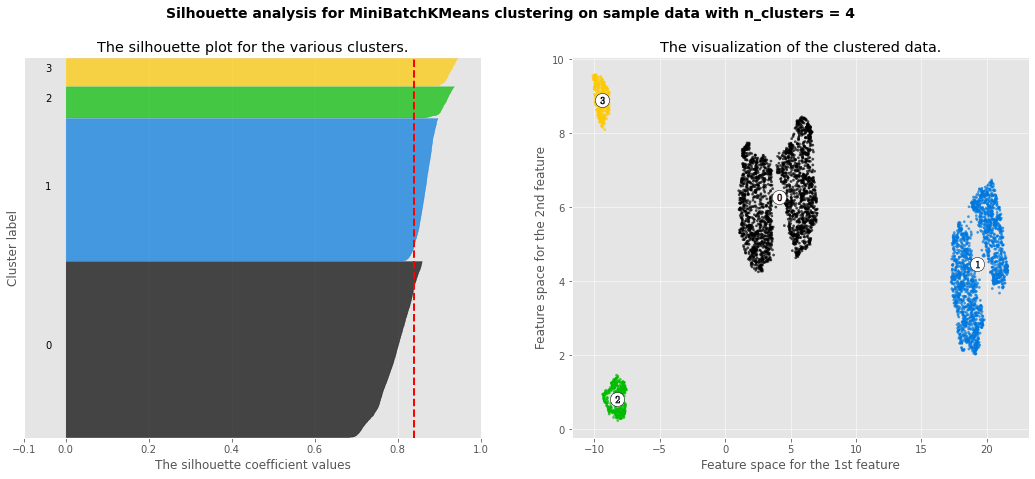

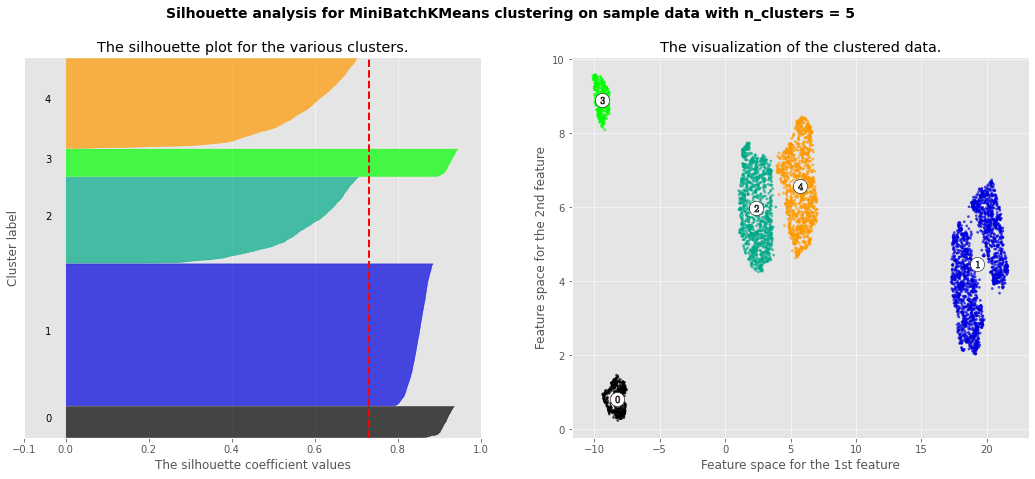

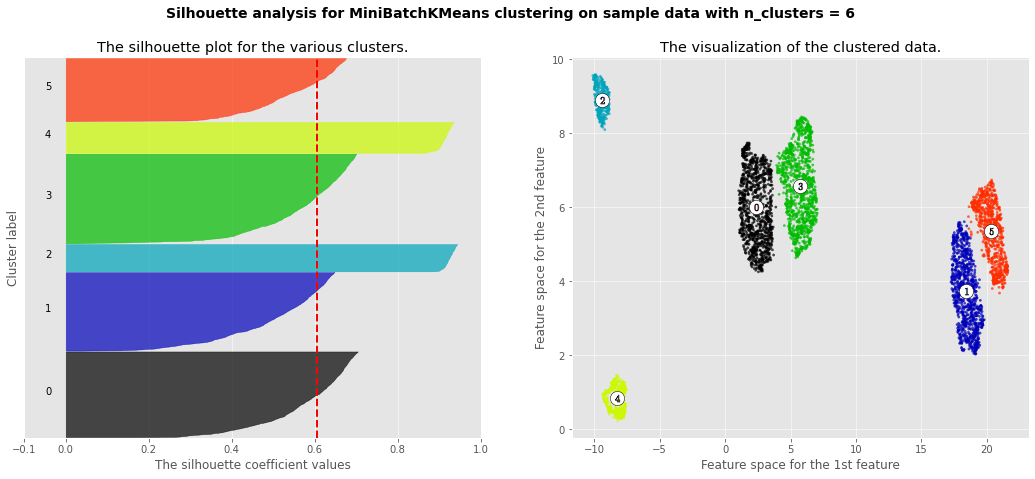

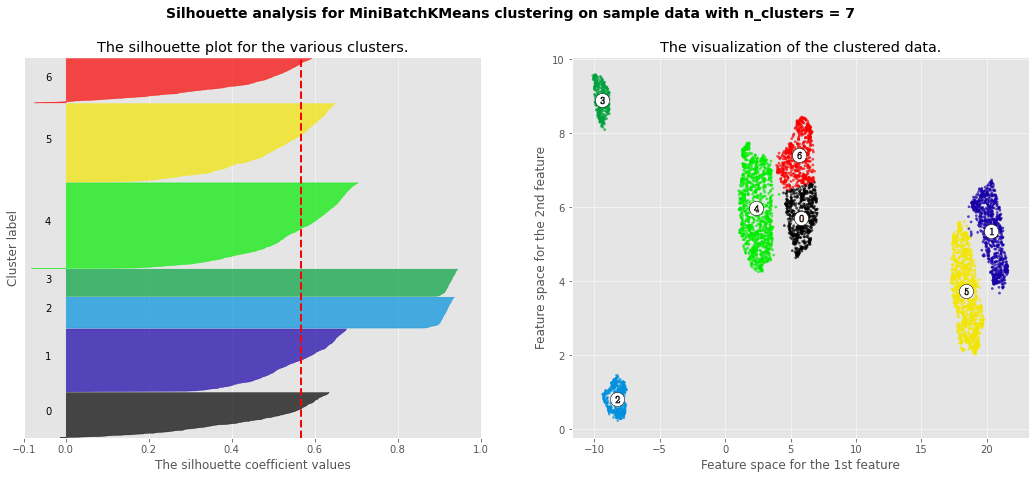

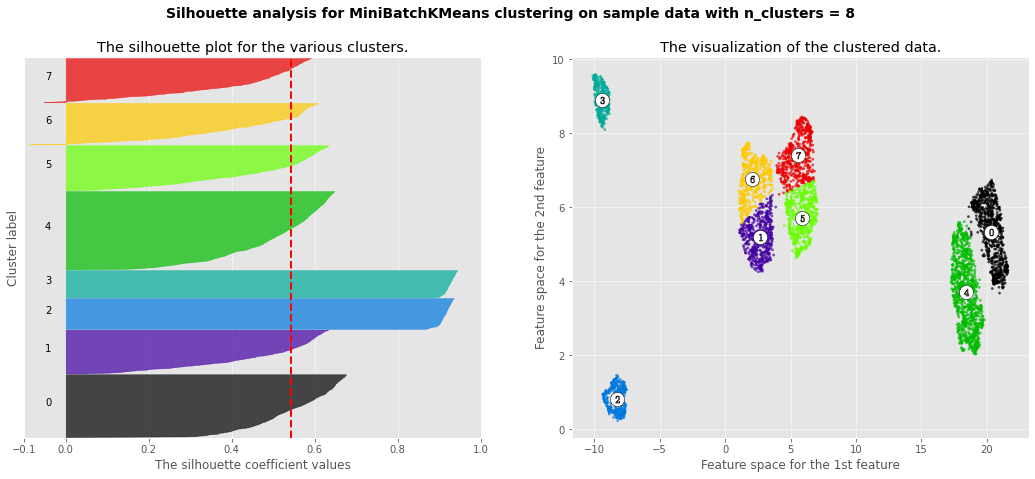

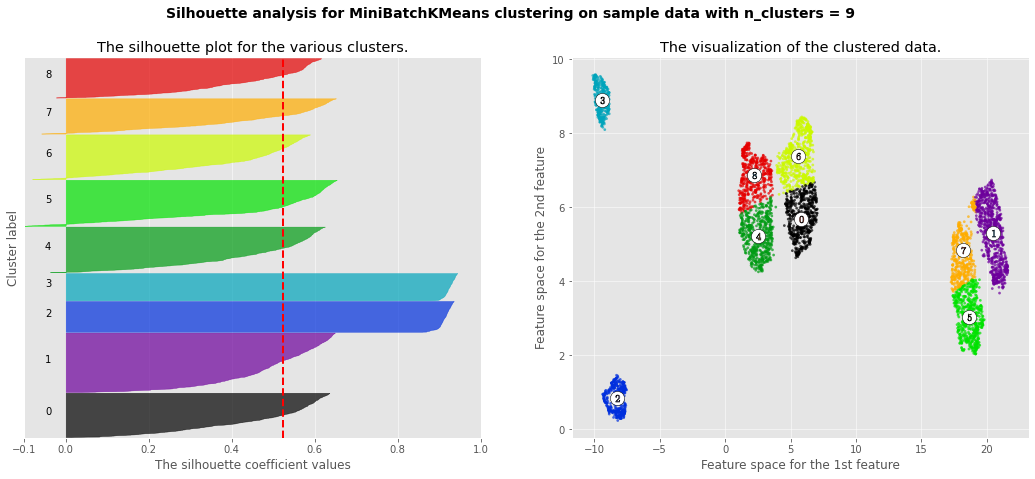

In [113]:
import matplotlib.cm as cm

range_n_clusters = range(2, 10)

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(sample_umap) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = MiniBatchKMeans(init='k-means++', n_clusters=n_clusters, max_iter=1000,random_state=10)
    cluster_labels = clusterer.fit_predict(sample_umap)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(sample_umap, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(sample_umap, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(sample_umap[:, 0], sample_umap[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for MiniBatchKMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

In [114]:
# Subset du dictionnaire slc où les valeurs de clé sont supérieurs ou égales à 4
# subset_slc = {key: value for key, value in slc.items() if key >= 4}

In [115]:
# Modèle KMeans avec coefficient de Silhouette maximal
# n_cluster_MBK = list(slc.keys())[list(slc.values()).index(max(slc.values()))]
# print('Nombre optimale = {}'.format(n_cluster_MBK))

n_cluster_MBK = 6

## 4. Modèle sélectionné

Pour n_clusters = 6 le score de silhouette obtenu avec KMeans et MiniBatchKMeans est très proche. Cependant MiniBatchKMeans est quelque peu plus rapide. Notre choix se porte sur MiniBatchKMeans.

In [116]:
# Modèle sélectionné
mbk = MiniBatchKMeans(init='k-means++', n_clusters=n_cluster_MBK, max_iter=1000, random_state=10)

For n_clusters = 6 The average silhouette_score is : 0.6065102


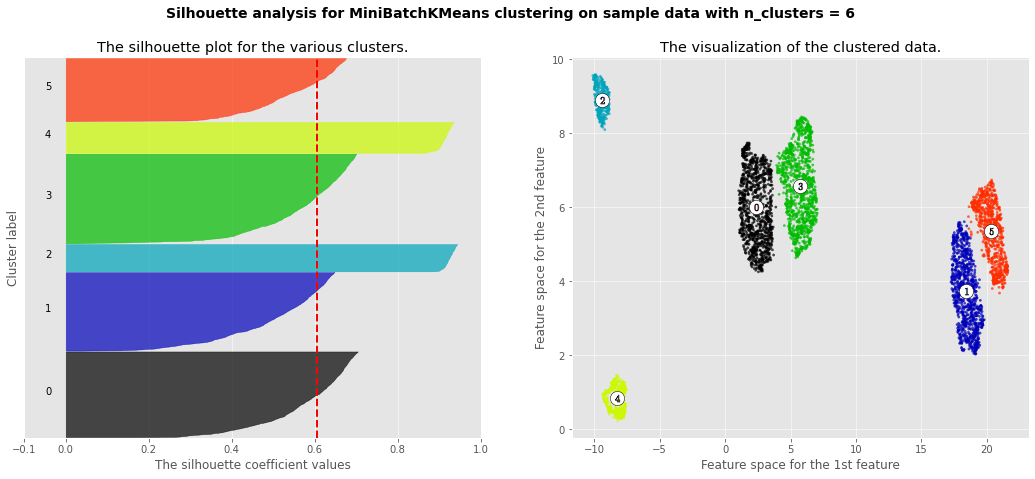

In [117]:
# Silhouette plots pour le modèle sélectionné

fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(18, 7)

ax1.set_xlim([-0.1, 1])

ax1.set_ylim([0, len(sample_umap) + (n_cluster_MBK + 1) * 10])

clusterer = mbk
cluster_labels = clusterer.fit_predict(sample_umap)
silhouette_avg = silhouette_score(sample_umap, cluster_labels)
print("For n_clusters =", n_cluster_MBK,
      "The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(sample_umap, cluster_labels)

y_lower = 10
for i in range(n_cluster_MBK):
    # Aggregate the silhouette scores for samples belonging to
    # cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / n_cluster_MBK)
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("The silhouette plot for the various clusters.")
ax1.set_xlabel("The silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

# 2nd Plot showing the actual clusters formed
colors = cm.nipy_spectral(cluster_labels.astype(float) / n_cluster_MBK)
ax2.scatter(sample_umap[:, 0], sample_umap[:, 1], marker='.', s=30, lw=0, alpha=0.7,
            c=colors, edgecolor='k')

# Labeling the clusters
centers = clusterer.cluster_centers_
# Draw white circles at cluster centers
ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
            c="white", alpha=1, s=200, edgecolor='k')

for i, c in enumerate(centers):
    ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                s=50, edgecolor='k')

ax2.set_title("The visualization of the clustered data.")
ax2.set_xlabel("Feature space for the 1st feature")
ax2.set_ylabel("Feature space for the 2nd feature")

plt.suptitle(("Silhouette analysis for MiniBatchKMeans clustering on sample data "
              "with n_clusters = %d" % n_cluster_KMean),
             fontsize=14, fontweight='bold')

plt.show()

## 5. Features importances

Un numéro de cluster a été attribué à chaque client unique. Une problématique de classification est maintenant considérée. On cherche à savoir l'importance relative de chaque feature à la prédiction de l'étiquette du cluster issu d'un modèle de classification.

RandomForestClassifier est utilisé où la fonction feature_importance_ est implémentée.

https://machinelearningmastery.com/calculate-feature-importance-with-python/

In [118]:
# Dataframe des clusters identifiés
df_cluster_labels = pd.DataFrame(cluster_labels, index = sample_scaled.index)
df_cluster_labels.columns = ['cluster_labels']

In [119]:
sample.isna().sum()

review_delay                 0
review_answer_delay          0
estimated_delivery_time      5
delivery_time              125
diff_time_delivery         125
shipping_time               76
approval_time                5
purchase_hour                0
purchase_year                0
purchase_month               0
purchase_day                 0
payment_sequential           0
freight_value                0
price                        0
payment_value                0
order_item_id                0
product_weight_g            38
product_photos_qty         119
product_name_lenght        119
volume                      38
Recency                      0
Frequency                    0
Monetary                     0
R                            0
F                            0
M                            0
dtype: int64

In [120]:
# Imputation du sample original sans normalisation
numerical_features = sample.select_dtypes(include=['int64', 'float64']).columns
categorical_features = sample.select_dtypes(include=['object', 'bool']).columns

In [121]:
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),  
])

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[  
    #('encoder', OrdinalEncoder()),
    ('imputer', SimpleImputer(strategy='median')),  
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features),
    ])

preprocessing_pipeline = Pipeline(steps=[('preprocessor', preprocessor)])

In [122]:
# Définitiondu dataframe preprocessed
sample_imputed = preprocessing_pipeline.fit_transform(sample)
df_sample_imputed = pd.DataFrame(sample_imputed,
                                 index=sample.index,
                                 columns=sample.columns)

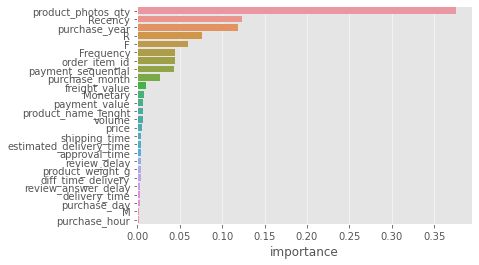

In [123]:
# random forest for feature importance on a classification problem
from sklearn.ensemble import RandomForestClassifier
from matplotlib import pyplot

X, y = df_sample_imputed, df_cluster_labels
# define the model
model = RandomForestClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
df_importance = pd.DataFrame(importance,
                             index=X.columns,
                             )
df_importance = df_importance.rename(columns={0: 'importance'})
df_importance = df_importance.sort_values(by = ['importance'], ascending=False)
# plot feature importance
 # .nlargest(4) # pandas Series method which will return a subset of the series with the largest n values.

sns.barplot(x='importance',
            y=df_importance.index, data=df_importance)

Sélection des features qui contribuent à au moins 5% dans l'attribution des clusters

In [124]:
features_selected = list(df_importance[df_importance['importance']>=0.05].index)
print(features_selected)

['product_photos_qty', 'Recency', 'purchase_year', 'R', 'F']


## 6. Caractérisation des clusters

Caractérisation des clusters issus de l'échantillon de customer_dataset (voir 2.2)

In [125]:
sample_clustered = df_sample_imputed.join(df_cluster_labels)
sample_clustered.head()

review_delay  review_answer_delay  \
customer_unique_id                                                    
1734eaee5f45a8f811841efba80b1a6e      6.126111             1.343831   
030d75f71f5db22bf54db16fc57bae5e     13.251782             0.748403   
4c02484da9f8d77218343a54f5f9158d      6.087616             1.867836   
46298e3a5aebca6fd516a2a13401c0cd      3.120764             1.571007   
9cc73b2f1f13d58e4e11389fde3e2402      5.015336            14.000660   

                                  estimated_delivery_time  delivery_time  \
customer_unique_id                                                         
1734eaee5f45a8f811841efba80b1a6e                13.114352       6.046759   
030d75f71f5db22bf54db16fc57bae5e                17.246238      13.036944   
4c02484da9f8d77218343a54f5f9158d                17.076296       5.873519   
46298e3a5aebca6fd516a2a13401c0cd                 5.108160       3.071829   
9cc73b2f1f13d58e4e11389fde3e2402                17.001568       4.930851   

                                  diff_time_delivery  shipping_time  \
customer_unique_id                                                    
1734eaee5f45a8f811841efba80b1a6e           -7.067593       3.304398   
030d75f71f5db22bf54db16fc57bae5e           -4.209294      -0.808044   
4c02484da9f8d77218343a54f5f9158d          -11.202778       5.071620   
46298e3a5aebca6fd516a2a13401c0cd           -2.036331       4.227257   
9cc73b2f1f13d58e4e11389fde3e2402          -12.070718       4.973084   

                                  approval_time  purchase_hour  purchase_year  \
customer_unique_id                                                              
1734eaee5f45a8f811841efba80b1a6e       0.011759           20.0         2018.0   
030d75f71f5db22bf54db16fc57bae5e       0.005544           17.0         2018.0   
4c02484da9f8d77218343a54f5f9158d       0.011319           21.0         2017.0   
46298e3a5aebca6fd516a2a13401c0cd       0.012604           21.0         2018.0   
9cc73b2f1f13d58e4e11389fde3e2402       0.013767           11.0         2018.0   

                                  purchase_month  purchase_day  \
customer_unique_id                                               
1734eaee5f45a8f811841efba80b1a6e             5.0           8.0   
030d75f71f5db22bf54db16fc57bae5e             8.0          10.0   
4c02484da9f8d77218343a54f5f9158d             9.0          14.0   
46298e3a5aebca6fd516a2a13401c0cd             8.0          21.0   
9cc73b2f1f13d58e4e11389fde3e2402             8.0          13.0   

                                  payment_sequential  freight_value   price  \
customer_unique_id                                                            
1734eaee5f45a8f811841efba80b1a6e                 1.0           9.59  175.92   
030d75f71f5db22bf54db16fc57bae5e                 1.0          28.03  150.00   
4c02484da9f8d77218343a54f5f9158d                 1.0          13.65   89.90   
46298e3a5aebca6fd516a2a13401c0cd                 1.0           7.94   96.99   
9cc73b2f1f13d58e4e11389fde3e2402                 2.0          33.84  203.99   

                                  payment_value  order_item_id  \
customer_unique_id                                               
1734eaee5f45a8f811841efba80b1a6e         185.51            1.0   
030d75f71f5db22bf54db16fc57bae5e         178.03            1.0   
4c02484da9f8d77218343a54f5f9158d         103.55            1.0   
46298e3a5aebca6fd516a2a13401c0cd         104.93            1.0   
9cc73b2f1f13d58e4e11389fde3e2402         237.83            2.0   

                                  product_weight_g  product_photos_qty  \
customer_unique_id                                                       
1734eaee5f45a8f811841efba80b1a6e             700.0                 4.0   
030d75f71f5db22bf54db16fc57bae5e            4000.0                 1.0   
4c02484da9f8d77218343a54f5f9158d            1350.0                 1.0   
46298e3a5aebca6fd516a2a13401c0cd             100.0                 1.0   
9cc73b2f1f13d

In [126]:
# taille de l'échantillon
len(sample_clustered)

4805

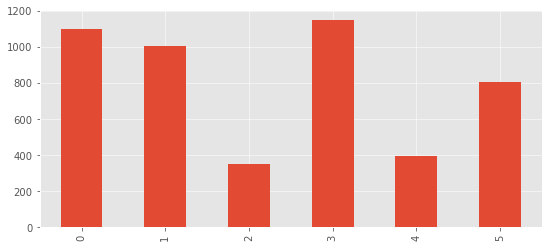

In [127]:
# Répartition des clients dans les clusters
sample_clustered['cluster_labels'].value_counts().sort_index().plot.bar(figsize=(9, 4))

In [128]:
features_selected

['product_photos_qty', 'Recency', 'purchase_year', 'R', 'F']

In [129]:
# Parallel Coordinates Plots pour la caractérisation des clusters

import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = sample_clustered['cluster_labels'],
                   colorscale = [[0,'red'],[0.1,'blue'],[0.2,'yellow'], [0.3,'green'],[0.4,'darkgreen'],
                                 [0.5,'orange'], [0.6,'purple'],[0.7,'lightblue'],[1,'gold']]),
        
        dimensions = list([
            dict(range = [sample_clustered['product_photos_qty'].min(),sample_clustered['product_photos_qty'].max()],
                 #constraintrange = [100000,150000],
                 label = "product_photos_qty", values = sample_clustered['product_photos_qty']),
            
            dict(range = [-1,6],
                 tickvals = [0,1,2,3,4,5],
                 label = 'cluster_labels', values = sample_clustered['cluster_labels']),
            
            dict(range = [sample_clustered['payment_sequential'].min(),sample_clustered['payment_sequential'].max()],
                 #constraintrange = [100000,150000],
                 label = "payment_sequential", values = sample_clustered['payment_sequential']),
            
            dict(range = [sample_clustered['purchase_year'].min(),sample_clustered['purchase_year'].max()],
                 #constraintrange = [100000,150000],
                 label = "purchase_year", values = sample_clustered['purchase_year']),
            
            dict(range = [sample_clustered['order_item_id'].min(),sample_clustered['order_item_id'].max()],
                 #constraintrange = [100000,150000],
                 label = "order_item_id", values = sample_clustered['order_item_id']),
        
            dict(range = [sample_clustered['purchase_month'].min(),sample_clustered['purchase_month'].max()],
                 #constraintrange = [100000,150000],
                 label = "purchase_month", values = sample_clustered['purchase_month'])])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

In [130]:
# Valeurs moyennes par variables et par clusters
column_names = list(sample_clustered.columns)

df_mean = pd.DataFrame(columns = column_names)

for i in range(6):
    df_mean = df_mean.append((pd.DataFrame(sample_clustered[sample_clustered['cluster_labels']==i].mean())).transpose())

In [138]:
# Parallel Coordinates Plots pour la caractérisation des clusters

import plotly.graph_objects as go

fig = go.Figure(data=
    go.Parcoords(
        line = dict(color = sample_clustered['cluster_labels'],
                   colorscale = [[0,'red'],[0.1,'blue'],[0.2,'yellow'], [0.3,'green'],[0.4,'darkgreen'],
                                 [0.5,'orange'], [0.6,'purple'],[0.7,'lightblue'],[1,'gold']]),
        
        dimensions = list([
            dict(range = [int(df_mean['product_photos_qty'].min()),int(df_mean['product_photos_qty'].max())],
                 #constraintrange = [100000,150000],
                 label = "product_photos_qty", values = df_mean['product_photos_qty'].astype('int64')),
            
            dict(range = [-1,6],
                 tickvals = [0,1,2,3,4,5],
                 label = 'cluster_labels', values = df_mean['cluster_labels']),
            
            dict(range = [int(df_mean['payment_sequential'].min()),int(df_mean['payment_sequential'].max())],
                 #constraintrange = [100000,150000],
                 label = "payment_sequential", values = df_mean['payment_sequential'].astype('int64')),
            
            dict(range = [sample_clustered['purchase_year'].min(),sample_clustered['purchase_year'].max()],
                 #constraintrange = [100000,150000],
                 label = "purchase_year", values = df_mean['purchase_year'].astype('int64')),
            
            dict(range = [int(sample_clustered['order_item_id'].min()),int(df_mean['order_item_id'].max())],
                 #constraintrange = [100000,150000],
                 label = "order_item_id", values = df_mean['order_item_id'].astype('int64')),
        
            dict(range = [sample_clustered['purchase_month'].min(),sample_clustered['purchase_month'].max()],
                 #constraintrange = [100000,150000],
                 label = "purchase_month", values = df_mean['purchase_month'].astype('int64'))])
    )
)

fig.update_layout(
    plot_bgcolor = 'white',
    paper_bgcolor = 'white'
)

fig.show()

## 7. Stabilité temporelle

Evaluation de la stabilité temporelle de l'attribution des labels de clusters dans le temps pour chaque mois de la base de données clients.

In [132]:
customer_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96096 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   review_delay             96096 non-null  float64
 1   review_answer_delay      96096 non-null  float64
 2   estimated_delivery_time  95997 non-null  float64
 3   delivery_time            93343 non-null  float64
 4   diff_time_delivery       93343 non-null  float64
 5   shipping_time            94465 non-null  float64
 6   approval_time            95997 non-null  float64
 7   purchase_hour            96096 non-null  int64  
 8   purchase_year            96096 non-null  int64  
 9   purchase_month           96096 non-null  int64  
 10  purchase_day             96096 non-null  int64  
 11  payment_sequential       96096 non-null  float64
 12  freight_value            96096 non-null  float64
 13  price                  

In [133]:
# Le dataset customer_dataset complet est preprocessed
customer_dataset_scaled = preprocessing_pipeline.fit_transform(customer_dataset)
customer_dataset_scaled = pd.DataFrame(customer_dataset_scaled, 
                                       index = customer_dataset.index, 
                                       columns = customer_dataset.columns)

In [134]:
# Réduction 
customer_dataset_reduced = umap.UMAP().fit_transform(customer_dataset_scaled)

# Transformation en dataframe
df_customer_dataset_reduced = pd.DataFrame(customer_dataset_reduced, 
                                    index = customer_dataset_scaled.index, 
                                    columns = ['Factor1', 'Factor2'])

df_customer_dataset_reduced_time = pd.merge(customer_dataset[['purchase_year', 'purchase_month']], 
                                            df_customer_dataset_reduced, 
                                            left_index=True, right_index=True,  how = 'outer')

In [135]:
# Clusters labels
cluster_labels = clusterer.fit_predict(customer_dataset_reduced)
df_cluster_labels = pd.DataFrame(cluster_labels, index = df_customer_dataset_reduced.index)
df_cluster_labels.rename(columns={0: "clusters"}, inplace = True)

Le bloc ci-dessous permet d'obtenir le coefficient ARI entre les labels de clusters obtenus sur tout le dataset customer_dataset préalablement imputé et les labels de clusters de ce même dataset subdivisé en périodes mensuelles. Ceci permet de plotter l'évolution du coefficient ARI en fonctions par mois sur tout la période de la base de donnée client.

L'indice ARI est une fonction qui mesure la similitude entre des deux affectations de labels de clusters.

Text(0, 0.5, 'Stabilité - coefficient ARI')

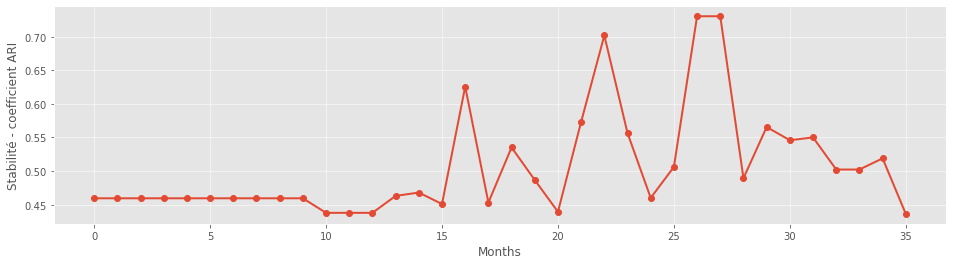

In [136]:
from sklearn.metrics.cluster import adjusted_rand_score

year =  (df_customer_dataset_reduced_time.purchase_year.astype(int).unique()).tolist() # liste d'année du dataset
month =  (df_customer_dataset_reduced_time.purchase_month.astype(int).unique()).tolist() # liste de mois du dataset

datasets = []
MetricScores = []

# Pour chaque mois de chaque année on extrait la partie du dataset correspand
# et on le stocke dans une liste de datasets mensuels
for y in year:
    for m in month:
        data = df_customer_dataset_reduced_time.loc[(df_customer_dataset_reduced_time.purchase_year == y)
                                                    & (df_customer_dataset_reduced_time.purchase_month == m),:]
        datasets.append(data)
        
df_merge = []

# Pour chaque élement de la liste de dataset mensuel on calcule le score ARI entre les labels
# d'un dataset mensuel et ceux du dataset global pour la même période

for i in range(len(datasets)):
    df_merge.append(datasets[i])
    if len(df_merge) == 1 :
        df_final = df_merge[0]
        if len(df_final) >= n_cluster_MBK:
            df_final.drop(['purchase_year', 'purchase_month'], axis = 1 , inplace = True)
            clusterer.fit(df_final)
            labels_true = df_cluster_labels.loc[df_final.index, 'clusters'].tolist()
            MetricScores.append(adjusted_rand_score(labels_true, clusterer.labels_))
    else:
        df_final = pd.concat(df_merge)
        if len(df_final) >= n_cluster_MBK:
            df_final.drop(['purchase_year', 'purchase_month'], axis = 1 , inplace = True)
            clusterer.fit(df_final)
            labels_true = df_cluster_labels.loc[df_final.index, 'clusters'].tolist()
            MetricScores.append(adjusted_rand_score(labels_true, clusterer.labels_))

MetricScores.reverse()

#Plot des résultats
fig = plt.figure(figsize=(16, 4))
plt.plot(range(len(MetricScores)), MetricScores, marker='o')
plt.xlabel('Months')
plt.ylabel('Stabilité - coefficient ARI')